Dataset "StudentPerformanceFactors" tập trung vào các yếu tố ảnh hưởng đến kết quả học tập của học sinh, đặc biệt là điểm thi cuối kỳ. Dataset này bao gồm nhiều khía cạnh từ học thuật đến phi học thuật, nhằm phản ánh bức tranh toàn diện về môi trường học tập của học sinh. Thông qua phân tích dữ liệu, có thể khám phá các yếu tố chủ chốt giúp cải thiện thành tích học tập, từ đó hỗ trợ nhà giáo dục và phụ huynh trong việc đưa ra các chiến lược hỗ trợ học sinh học tập hiệu quả hơn.
- Hours_Studied: Số giờ học mỗi tuần.
- Attendance: Tỷ lệ phần trăm các lớp học đã tham dự.
- Parental_Involvement: Mức độ tham gia của phụ huynh vào quá trình học tập của học sinh (Thấp, Trung bình, Cao).
- Access_to_Resources: Tính khả dụng của các nguồn lực giáo dục (Thấp, Trung bình, Cao).
- Extracurricular_Activities: Tham gia các hoạt động ngoại khóa (Có, Không).
- Sleep_Hours: Số giờ ngủ trung bình mỗi đêm.
- Previous_Scores: Điểm số từ các kỳ thi trước.
- Motivation_Level: Mức độ động lực của học sinh (Thấp, Trung bình, Cao).
- Internet_Access: Tính khả dụng của kết nối internet (Có, Không).
- Tutoring_Sessions: Số buổi học kèm đã tham dự mỗi tháng.
- Family_Income: Thu nhập gia đình.
- Teacher_Quality: Chất lượng giáo viên (Thấp, Trung bình, Cao).
- School_Type: Loại trường đã theo học (Công lập, Tư thục).
- Peer_Influence: Ảnh hưởng của bạn bè đến kết quả học tập (Tích cực, Trung lập, Tiêu cực).
- Physical_Activity: Số giờ hoạt động thể chất trung bình mỗi tuần.
- Learning_Disabilities: Có khuyết tật học tập không (Có, Không).
- Parental_Education_Level: Trình độ học vấn cao nhất của cha mẹ (Trung học phổ thông, Cao đẳng, Sau đại học).
- Distance_from_Home: Khoảng cách từ nhà đến trường (Gần, Trung bình, Xa).
- Gender: Giới tính của học sinh (Nam, Nữ).
- Exam_Score: Điểm thi cuối kỳ.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
import xgboost as xgb
from sklearn.svm import SVR

import joblib
import gc

# Data Import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/csv/StudentPerformanceFactors.csv'
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [ ]:
df.shape

(6607, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [ ]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
# Loại bỏ khoảng trắng thừa ở đầu hoặc cuối tên cột
df.columns = df.columns.str.strip()

# Thay thế giá trị thiếu
df['Teacher_Quality'] = df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0])
df['Parental_Education_Level'] = df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0])
df['Distance_from_Home'] = df['Distance_from_Home'].fillna(df['Distance_from_Home'].mode()[0])

In [ ]:
# Tính IQR (Interquartile Range) để phát hiện outliers
Q1 = df['Hours_Studied'].quantile(0.25)
Q3 = df['Hours_Studied'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Loại bỏ các giá trị ngoại lai
df = df[(df['Hours_Studied'] >= lower_bound) & (df['Hours_Studied'] <= upper_bound)]

In [ ]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours_Studied,6564.0,19.969226,5.828309,4.0,16.0,20.0,24.0,36.0
Attendance,6564.0,79.955972,11.540905,60.0,70.0,80.0,90.0,100.0
Sleep_Hours,6564.0,7.029403,1.467372,4.0,6.0,7.0,8.0,10.0
Previous_Scores,6564.0,75.081810,14.402906,50.0,63.0,75.0,88.0,100.0
Tutoring_Sessions,6564.0,1.493601,1.232201,0.0,1.0,1.0,2.0,8.0
Physical_Activity,6564.0,2.968160,1.030714,0.0,2.0,3.0,4.0,6.0
Exam_Score,6564.0,67.226996,3.852922,56.0,65.0,67.0,69.0,101.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6564 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6564 non-null   int64 
 1   Attendance                  6564 non-null   int64 
 2   Parental_Involvement        6564 non-null   object
 3   Access_to_Resources         6564 non-null   object
 4   Extracurricular_Activities  6564 non-null   object
 5   Sleep_Hours                 6564 non-null   int64 
 6   Previous_Scores             6564 non-null   int64 
 7   Motivation_Level            6564 non-null   object
 8   Internet_Access             6564 non-null   object
 9   Tutoring_Sessions           6564 non-null   int64 
 10  Family_Income               6564 non-null   object
 11  Teacher_Quality             6564 non-null   object
 12  School_Type                 6564 non-null   object
 13  Peer_Influence              6564 non-null   object
 1

In [ ]:
for col in df:
    print(df[col].value_counts())
    print('----------------------------')

Hours_Studied
20    465
19    441
21    431
23    411
22    402
18    401
17    381
24    357
16    351
15    315
25    289
14    269
26    263
27    229
13    218
12    192
28    171
11    146
29    134
30    123
10     94
9      86
31     77
8      58
32     54
7      51
33     40
34     29
5      21
35     20
4      17
6      17
36     11
Name: count, dtype: int64
----------------------------
Attendance
67     188
76     185
98     184
77     184
64     182
94     179
91     175
84     174
79     173
82     172
68     169
80     168
69     168
81     167
73     167
72     167
93     167
74     165
61     164
78     163
96     163
89     162
95     162
71     162
97     160
70     160
65     158
83     156
88     154
63     154
90     154
92     152
99     152
87     151
62     151
86     148
75     148
66     145
85     145
60      85
100     81
Name: count, dtype: int64
----------------------------
Parental_Involvement
Medium    3342
High      1892
Low       1330
Name: count, dtype

#Tạo thêm các biến có ý nghĩa

In [ ]:
dfd = df.copy()

# Điểm thi trung bình theo loại trường học
school_avg_score = df.groupby('School_Type')['Exam_Score'].mean()
df['Avg_Score_By_School'] = df['School_Type'].map(school_avg_score)

# Đánh giá mức độ hiệu quả học tập
df['Study_Efficiency'] = df['Exam_Score'] / df['Hours_Studied']

# Biến tương tác giữa School_Type và Hours_Studied
df['School_Hours_Interaction'] = df['School_Type'].astype(str) + "_" + (df['Hours_Studied'] > df['Hours_Studied'].median()).astype(str)

# Visualization

#Biểu đồ đếm cho dữ liệu phân loại

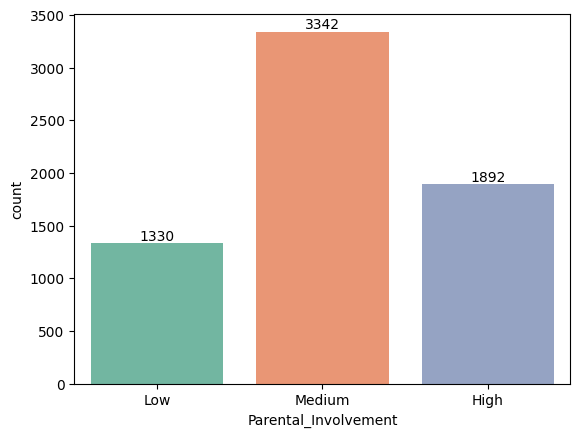

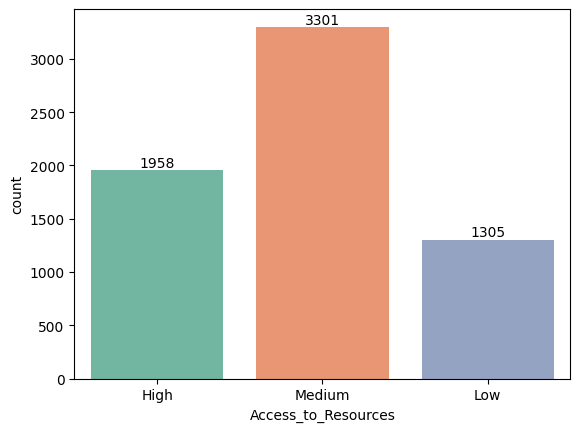

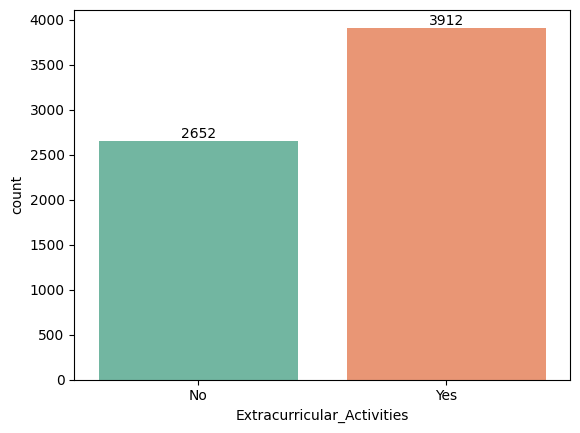

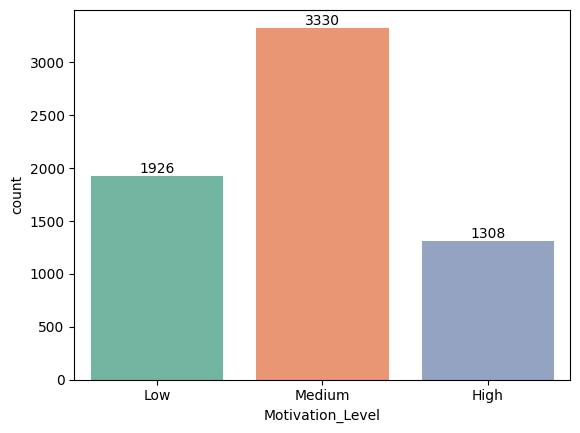

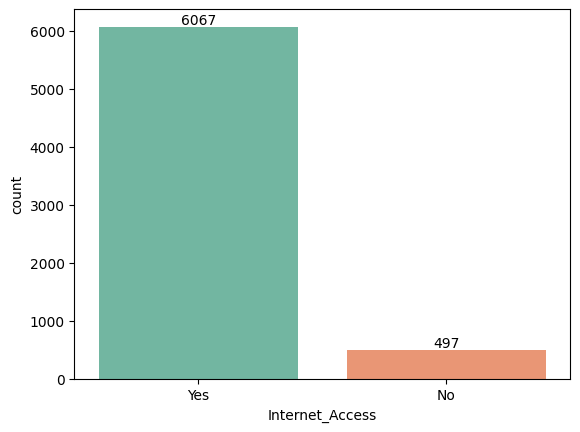

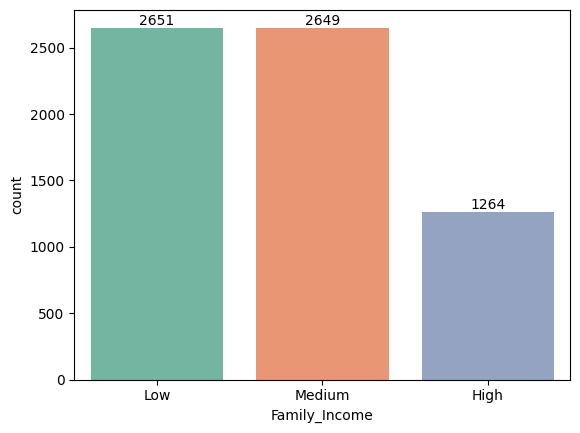

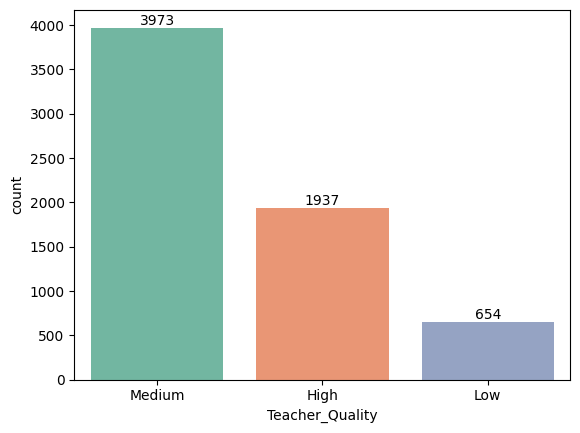

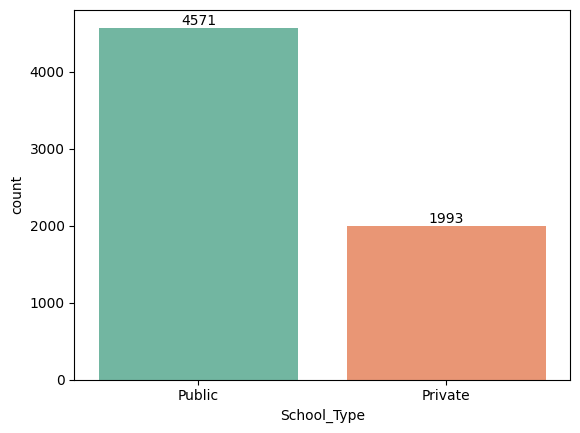

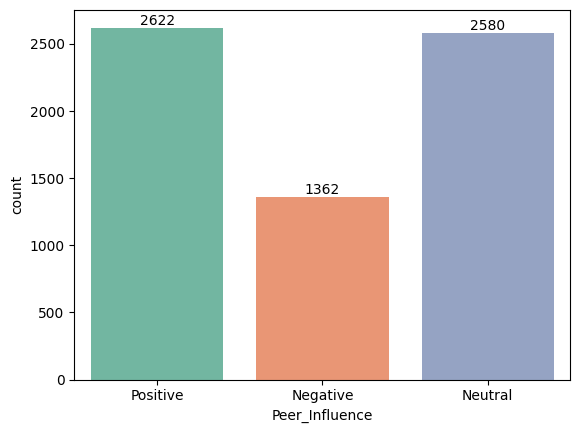

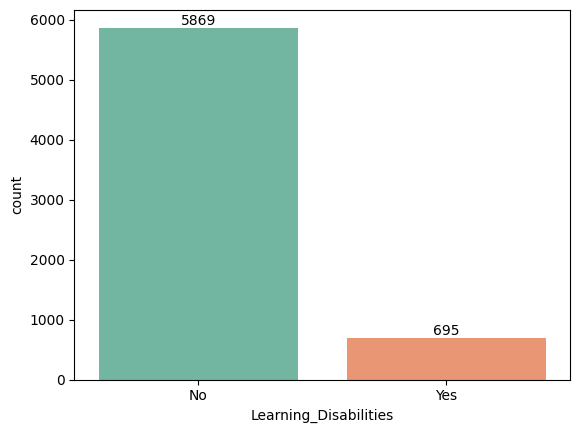

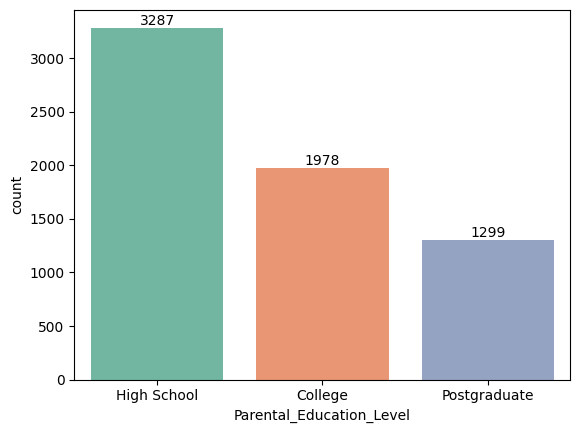

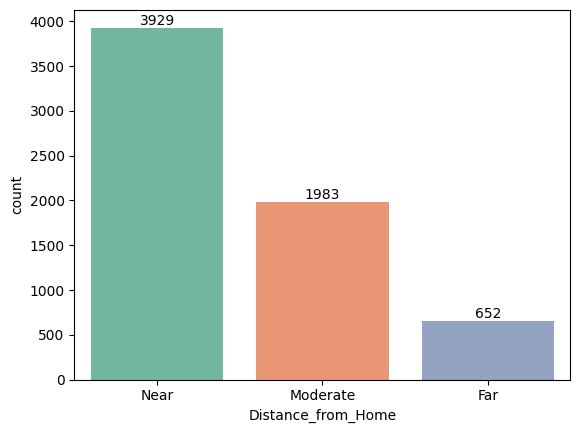

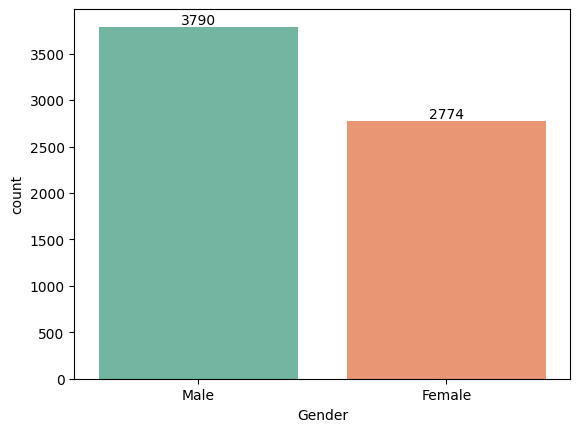

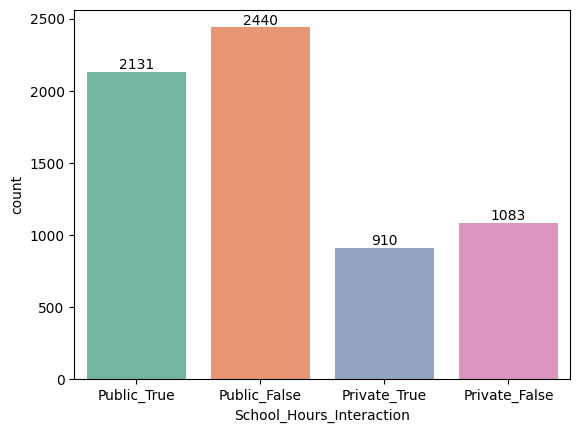

In [ ]:
for col in df:
    if df[col].dtype == 'O':
        ax = sns.countplot(data=df, x=col, hue=col, palette='Set2')  # Tạo biểu đồ cột
        # Thêm số liệu lên trên các cột
        for container in ax.containers:
            ax.bar_label(container, fmt='%d')  # Hiển thị số liệu (dạng số nguyên)

        plt.show()

#Phân phối của các cột số học

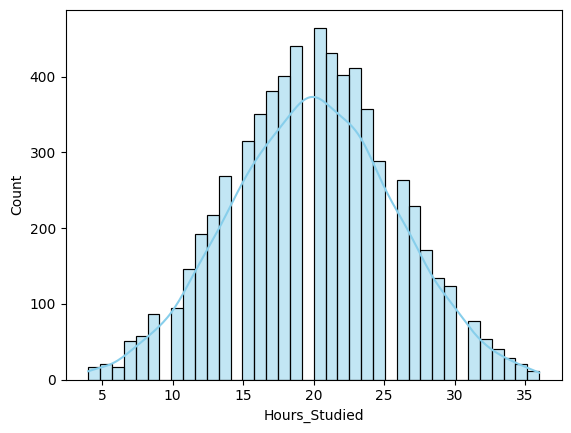

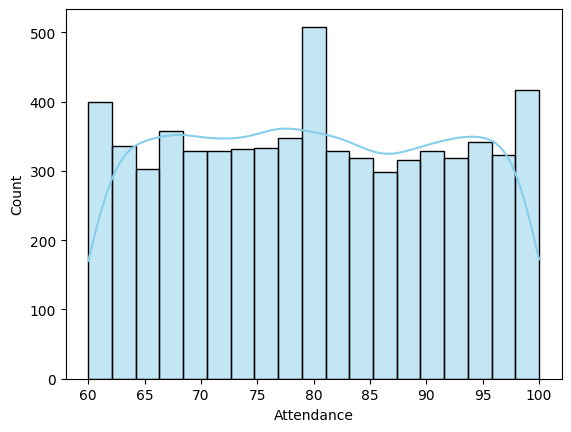

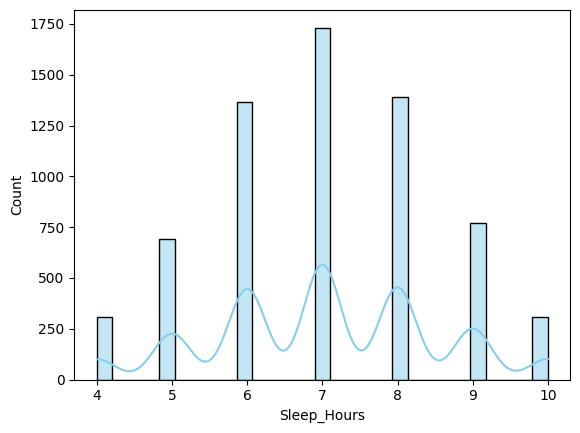

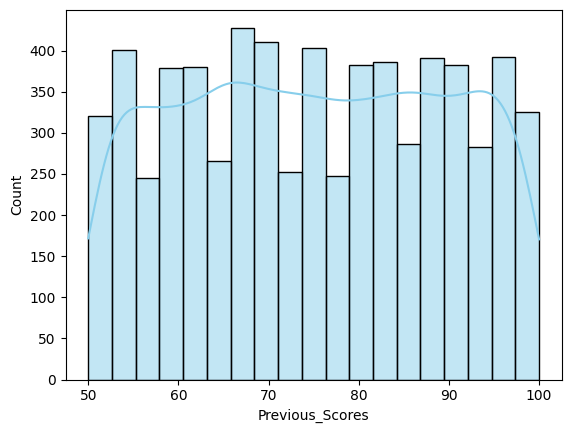

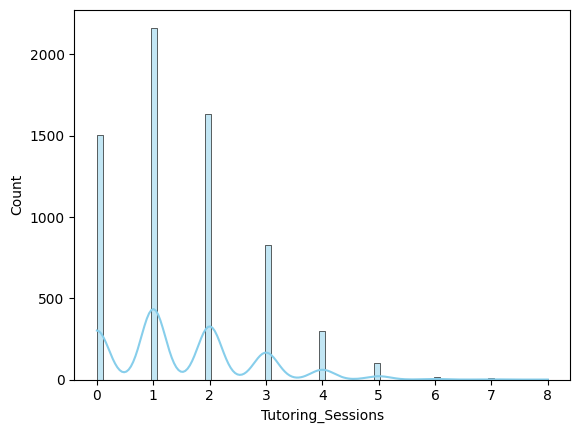

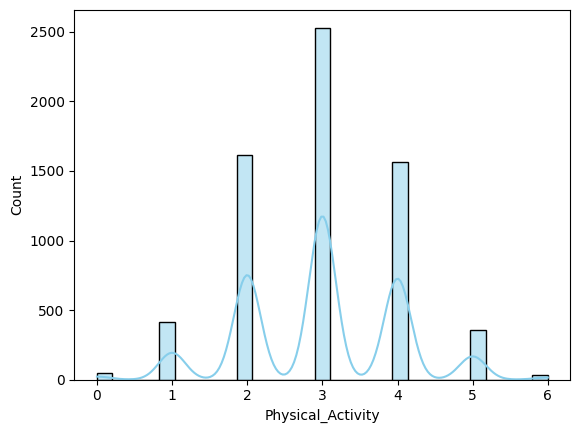

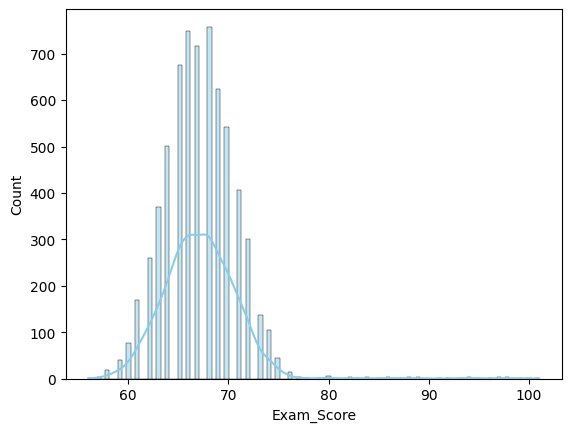

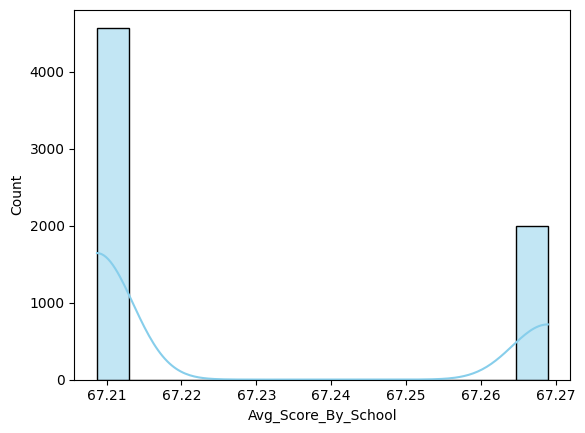

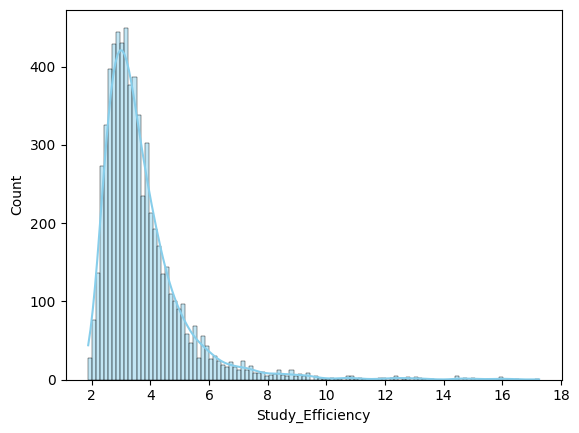

In [ ]:
for col in df:
    if df[col].dtype != 'O':
        sns.histplot(df[col], kde=True, color='skyblue')
        plt.show()

#Thời gian học tập vs Điểm thi

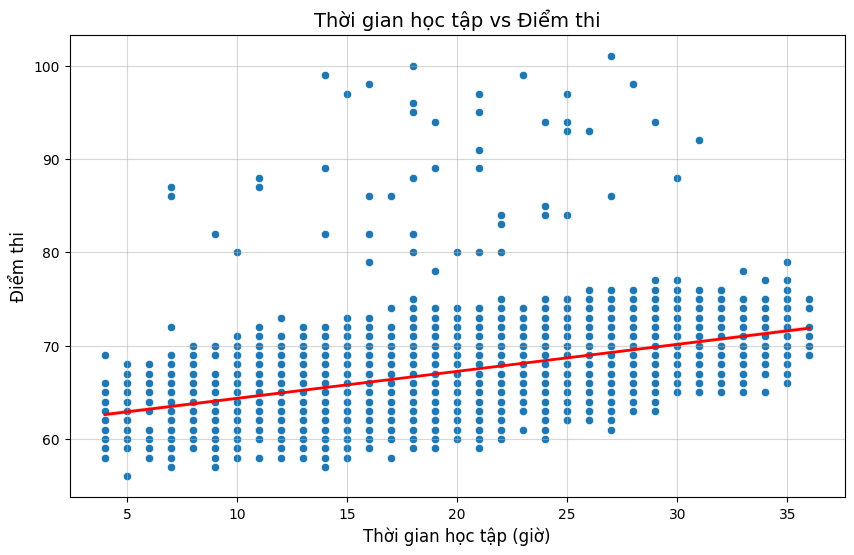

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Hours_Studied', y='Exam_Score', color='#1f77b4')

sns.regplot(data=df, x='Hours_Studied', y='Exam_Score', scatter=False, color='red', line_kws={'linestyle': '-', 'linewidth': 2})

plt.title('Thời gian học tập vs Điểm thi', fontsize=14)
plt.xlabel('Thời gian học tập (giờ)', fontsize=12)
plt.ylabel('Điểm thi', fontsize=12)
plt.grid(True, linestyle='-', alpha=0.5)
plt.show()

1. Miêu tả biểu đồ

  Biểu đồ này sử dụng hai yếu tố chính. Thứ nhất là scatterplot (các chấm màu xanh dương), biểu diễn từng học sinh với thời gian học tập (trục x) và điểm thi (trục y). Thứ hai là đường hồi quy tuyến tính (màu đỏ), thể hiện xu hướng tổng quát giữa thời gian học tập và điểm thi.

2. Nhận xét chi tiết

* Xu hướng tổng quát

  Biểu đồ cho thấy mối quan hệ tuyến tính dương, nghĩa là khi thời gian học tăng, điểm thi cũng có xu hướng tăng. Tuy nhiên, xu hướng này không thực sự mạnh mẽ vì dữ liệu phân tán khá rộng.

* Phân bố dữ liệu

  Các chấm không tập trung vào một vùng cố định mà rải rác trên biểu đồ. Một số học sinh học ít giờ vẫn đạt điểm cao, trong khi có học sinh học nhiều nhưng điểm lại thấp. Điều này gợi ý rằng ngoài thời gian học, có thể có các yếu tố khác như phương pháp học tập hoặc mức độ tập trung ảnh hưởng đến kết quả.

* Hiện tượng ngoại lệ

  Biểu đồ xuất hiện những trường hợp ngoại lệ rõ rệt. Một số học sinh học rất ít nhưng vẫn đạt điểm cao, có thể nhờ khả năng tự nhiên hoặc kiến thức sẵn có. Ngược lại, một số học sinh học rất nhiều giờ nhưng điểm vẫn thấp, có thể do phương pháp học chưa hiệu quả hoặc bị ảnh hưởng bởi các yếu tố ngoại cảnh như áp lực thi cử.

* Độ phù hợp của mô hình

   Đường hồi quy tuyến tính minh họa xu hướng tổng quát khá tốt. Tuy nhiên, với sự phân tán lớn, nó không thể phản ánh chi tiết hết tất cả các dữ liệu. Có thể thử nghiệm các mô hình phi tuyến như hồi quy bậc hai hoặc các kỹ thuật khác để nắm bắt tốt hơn sự phức tạp của dữ liệu.


3. Kết luận

  Thời gian học tập có tác động tích cực đến điểm thi, nhưng không phải là yếu tố duy nhất. Độ phân tán lớn cho thấy cần tập trung nhiều hơn vào chất lượng và phương pháp học tập. Biểu đồ cung cấp một cái nhìn tổng quan hữu ích, nhưng cần được bổ sung bằng các phân tích sâu hơn để rút ra kết luận chính xác và đầy đủ hơn.

#Tham gia hoạt động ngoại khóa theo giới tính

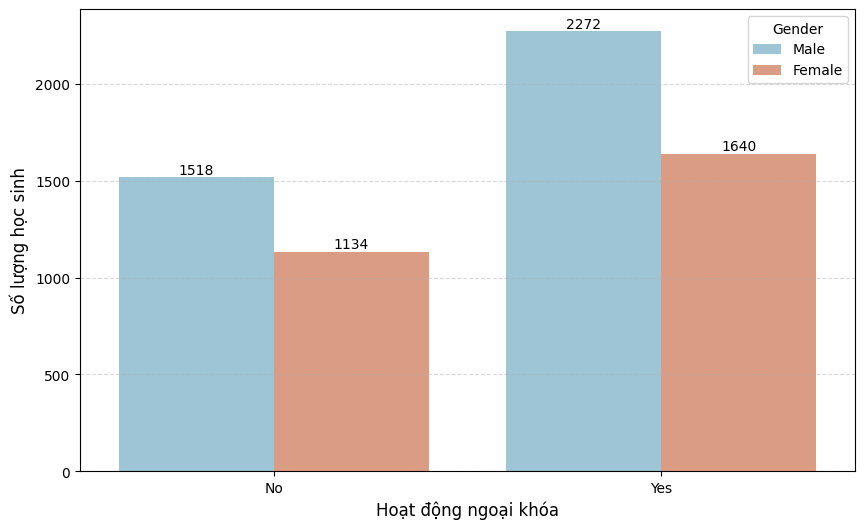

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Extracurricular_Activities', hue='Gender', palette=['#93C9DF', '#E99675'])

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

plt.title('', fontsize=14)
plt.xlabel('Hoạt động ngoại khóa', fontsize=12)
plt.ylabel('Số lượng học sinh', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

1. Miêu tả biểu đồ

  Biểu đồ này sử dụng countplot để hiển thị số lượng học sinh tham gia hoặc không tham gia các hoạt động ngoại khóa (trục x). Trục y thể hiện số lượng học sinh. Mỗi cột được chia nhỏ theo giới tính bằng cách sử dụng màu sắc khác nhau. Màu xanh dương đại diện cho nam và màu hồng đại diện cho nữ.

2. Nhận xét chi tiết

* Tổng quan

  Số lượng học sinh tham gia và không tham gia hoạt động ngoại khóa khá cân đối. Tuy nhiên, có sự khác biệt đáng kể giữa nam và nữ trong từng nhóm.

* Nhóm tham gia hoạt động ngoại khóa

  Nhóm học sinh tham gia hoạt động ngoại khóa có số lượng nam và nữ khá tương đồng. Điều này gợi ý rằng cả hai giới đều quan tâm đến các hoạt động ngoại khóa với mức độ tương tự nhau.

* Nhóm không tham gia hoạt động ngoại khóa

  Nhóm học sinh không tham gia có sự chênh lệch lớn hơn giữa nam và nữ. Số lượng nữ học sinh trong nhóm này cao hơn nam. Điều này có thể do các yếu tố như sở thích cá nhân hoặc thời gian biểu khác biệt giữa các giới.

* Sự phân bố tổng thể

  Số lượng tổng thể của cả hai giới trong hai nhóm không quá mất cân bằng. Điều này cho thấy hoạt động ngoại khóa được cả nam và nữ quan tâm, nhưng vẫn có một số khác biệt nhỏ trong mức độ tham gia.

3. Kết luận

  Biểu đồ cho thấy sự cân bằng tương đối giữa nam và nữ trong việc tham gia hoạt động ngoại khóa. Tuy nhiên, nhóm không tham gia có số lượng nữ học sinh cao hơn. Điều này gợi ý cần tìm hiểu thêm để hỗ trợ các học sinh này tham gia nhiều hơn, nhằm tăng cường kỹ năng mềm và sự gắn kết xã hội.

#Số giờ ngủ vs Điểm thi

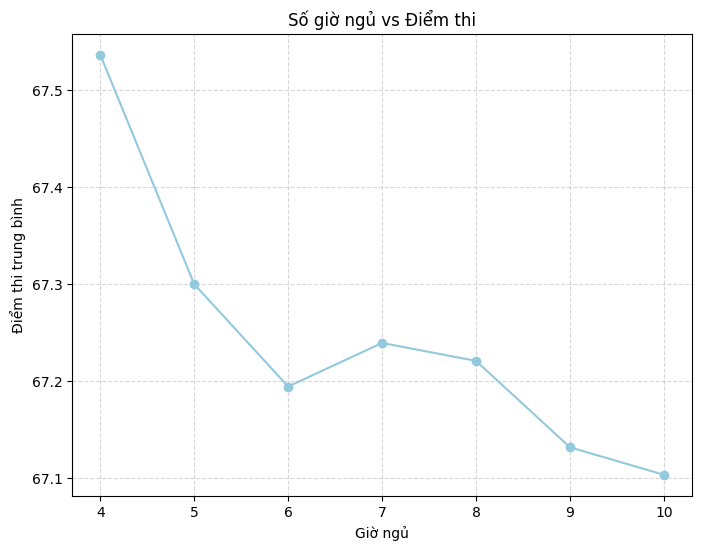

In [ ]:
sleep_score = df.groupby('Sleep_Hours')['Exam_Score'].mean()

plt.figure(figsize=(8, 6))
sleep_score.plot(kind='line', marker='o', color='#93C9DF')
plt.title('Số giờ ngủ vs Điểm thi')
plt.xlabel('Giờ ngủ')
plt.ylabel('Điểm thi trung bình')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

1. Miêu tả biểu đồ

  Biểu đồ này là dạng biểu đồ đường, biểu diễn mối quan hệ giữa số giờ ngủ (trục x) và điểm thi trung bình (trục y). Dữ liệu được tính toán bằng cách lấy điểm thi trung bình của từng nhóm học sinh có cùng số giờ ngủ.

2. Nhận xét chi tiết

* Xu hướng tổng quan

  Biểu đồ cho thấy mối quan hệ phi tuyến tính giữa số giờ ngủ và điểm thi trung bình. Điểm thi có sự thay đổi đáng kể khi số giờ ngủ dao động trong các khoảng khác nhau.

* Đoạn đầu (số giờ ngủ thấp)

  Học sinh ngủ ít giờ (1 đến 4 giờ) thường có điểm thi thấp hơn so với các nhóm khác. Điều này có thể do thiếu ngủ làm giảm khả năng tập trung và hiệu suất học tập.

* Đoạn giữa (số giờ ngủ trung bình)

  Học sinh ngủ từ 5 đến 7 giờ mỗi đêm có điểm thi cao nhất. Đây có thể là khoảng giờ ngủ tối ưu, giúp học sinh duy trì sự tỉnh táo và khả năng học tập hiệu quả.

* Đoạn cuối (số giờ ngủ cao)

  Khi số giờ ngủ tăng trên 8 giờ, điểm thi trung bình có xu hướng giảm nhẹ. Điều này có thể do ngủ quá nhiều làm giảm thời gian học tập hoặc ảnh hưởng tiêu cực đến lịch trình sinh hoạt.

3. Kết luận

  Số giờ ngủ ảnh hưởng đáng kể đến điểm thi. Học sinh ngủ từ 5 đến 7 giờ đạt kết quả cao nhất. Nên khuyến khích học sinh duy trì giờ ngủ hợp lý, tránh ngủ quá ít hoặc quá nhiều để đạt được hiệu suất học tập tốt nhất.

#Tham gia của phụ huynh vs Số buổi học thêm

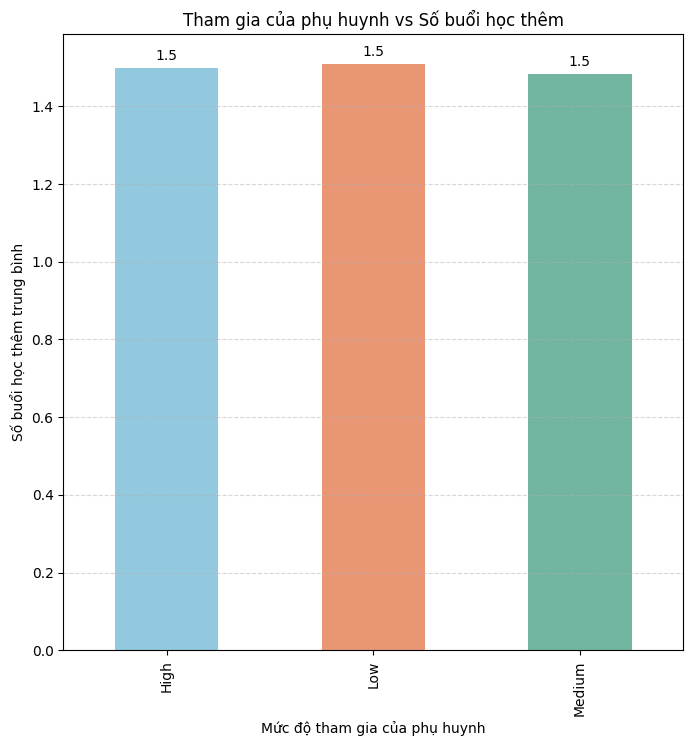

In [ ]:
parental_tutoring = df.groupby('Parental_Involvement')['Tutoring_Sessions'].mean()

plt.figure(figsize=(8, 8))
parental_tutoring.plot(kind='bar', color=['#93C9DF', '#E99675', '#72B6A1'])

for index, value in enumerate(parental_tutoring.values):
    plt.text(index, value + 0.02, f'{value:.1f}', ha='center', fontsize=10)

plt.title('Tham gia của phụ huynh vs Số buổi học thêm')
plt.xlabel('Mức độ tham gia của phụ huynh')
plt.ylabel('Số buổi học thêm trung bình')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

1. Miêu tả biểu đồ

  Biểu đồ dạng cột này thể hiện mối quan hệ giữa mức độ tham gia của phụ huynh (trục x) và số buổi học thêm trung bình (trục y). Các cột được gắn nhãn giá trị cụ thể phía trên để dễ quan sát.

2. Nhận xét chi tiết

* Đoạn 1: Mức tham gia thấp

  Phụ huynh ít tham gia vào việc học của con cái có số buổi học thêm trung bình thấp nhất. Điều này có thể phản ánh việc thiếu định hướng từ phụ huynh, dẫn đến học sinh ít tham gia vào các lớp học thêm.

* Đoạn 2: Mức tham gia trung bình

  Khi mức độ tham gia của phụ huynh tăng lên mức trung bình, số buổi học thêm tăng đáng kể. Đây là dấu hiệu cho thấy sự hỗ trợ và động viên của phụ huynh có vai trò thúc đẩy học sinh tham gia vào các lớp học thêm.

* Đoạn 3: Mức tham gia cao

  Ở mức tham gia cao nhất của phụ huynh, số buổi học thêm trung bình tiếp tục tăng lên mức cao nhất. Điều này cho thấy rằng sự tham gia tích cực của phụ huynh không chỉ ảnh hưởng đến ý thức học tập mà còn khuyến khích việc học thêm.

3. Kết luận

  Mức độ tham gia của phụ huynh có tương quan tích cực với số buổi học thêm trung bình. Cần khuyến khích phụ huynh tham gia tích cực vào việc học của con cái để hỗ trợ tốt nhất cho quá trình học tập.

#Số giờ hoạt động thể chất trung bình mỗi tuần

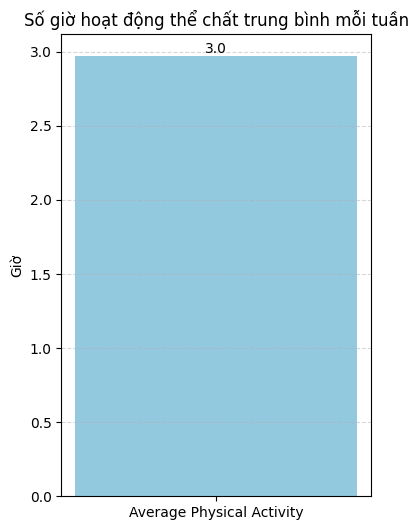

In [ ]:
average_physical_activity = df['Physical_Activity'].mean()
plt.figure(figsize=(4, 6))
bars = plt.bar(['Average Physical Activity'], [average_physical_activity], color='#93C9DF')
plt.title('Số giờ hoạt động thể chất trung bình mỗi tuần')
plt.ylabel('Giờ')
plt.grid(axis='y', linestyle='--', alpha=0.5)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.02, f'{height:.1f}', ha='center', fontsize=10)

plt.show()

1. Miêu tả biểu đồ

 Biểu đồ này là một biểu đồ cột đơn giản (bar chart) thể hiện số giờ hoạt động thể chất trung bình mỗi tuần của học sinh trong tập dữ liệu. Trục hoành (x) chỉ có một giá trị là "Average Physical Activity", đại diện cho mức độ hoạt động thể chất trung bình của tất cả học sinh. Trục tung (y) biểu thị số giờ hoạt động thể chất trung bình mỗi tuần. Màu sắc của cột được chọn là màu xanh nhạt (#93C9DF), và mỗi cột có một giá trị số được hiển thị ngay trên đỉnh của nó.

2. Nhận xét biểu đồ

 Biểu đồ cung cấp một cái nhìn tổng quan về mức độ hoạt động thể chất trung bình của học sinh, với chỉ một giá trị duy nhất là số giờ hoạt động thể chất mỗi tuần. Giá trị số giờ này thể hiện một mức trung bình trong toàn bộ tập dữ liệu. Từ biểu đồ, chúng ta có thể thấy rằng học sinh tham gia hoạt động thể chất trung bình ở mức nào trong một tuần, và giá trị này có thể giúp đánh giá lối sống của học sinh. Tuy nhiên, biểu đồ chỉ thể hiện thông tin trung bình và không phản ánh sự phân bố hoặc sự biến động giữa các học sinh.

3. Kết luận

 Biểu đồ này giúp chúng ta nhận ra mức độ tham gia hoạt động thể chất trung bình của học sinh, cho phép so sánh mức độ hoạt động thể chất với các yếu tố khác như kết quả học tập hay sức khỏe. Nếu giá trị trung bình này thấp, có thể cần đưa ra các biện pháp khuyến khích học sinh tham gia nhiều hơn vào các hoạt động thể chất để cải thiện sức khỏe và khả năng học tập.

#Hoạt động thể chất vs Điểm thi trung bình

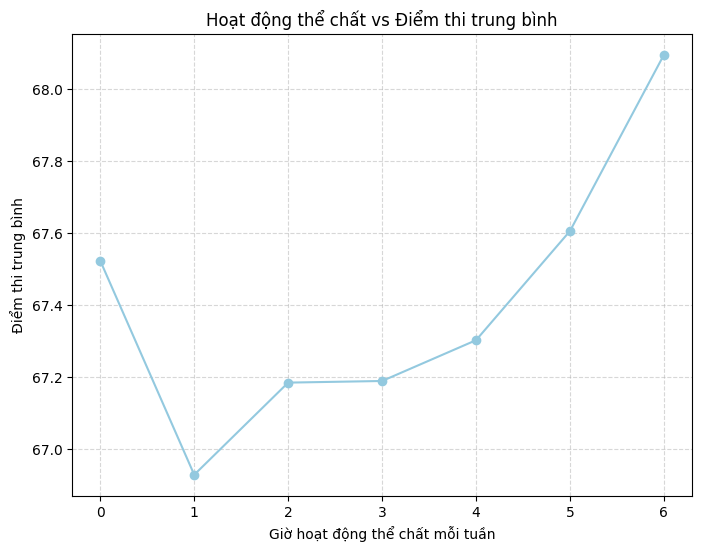

In [ ]:
physical_score = df.groupby('Physical_Activity')['Exam_Score'].mean()

plt.figure(figsize=(8, 6))
physical_score.plot(kind='line', marker='o', color='#93C9DF')
plt.title('Hoạt động thể chất vs Điểm thi trung bình')
plt.xlabel('Giờ hoạt động thể chất mỗi tuần')
plt.ylabel('Điểm thi trung bình')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


1. Miêu tả biểu đồ
  
  Biểu đồ này là một đồ thị đường (line plot) thể hiện mối quan hệ giữa số giờ hoạt động thể chất mỗi tuần và điểm thi trung bình của học sinh. Trục hoành (x) biểu thị số giờ hoạt động thể chất mỗi tuần, trong khi trục tung (y) biểu thị điểm thi trung bình. Dữ liệu được nhóm theo số giờ hoạt động thể chất và tính toán điểm thi trung bình cho mỗi nhóm. Biểu đồ sử dụng màu sắc nhẹ (#93C9DF) để vẽ đường biểu thị xu hướng của điểm thi theo mức độ hoạt động thể chất.

2. Nhận xét biểu đồ

  Biểu đồ cho thấy có một mối quan hệ giữa số giờ hoạt động thể chất và điểm thi trung bình. Đường biểu thị cho thấy điểm thi trung bình thay đổi theo số giờ hoạt động thể chất mỗi tuần. Nếu điểm thi trung bình có xu hướng tăng hoặc giảm khi số giờ hoạt động thể chất thay đổi, điều này cho thấy một sự ảnh hưởng của việc duy trì hoạt động thể chất đến kết quả học tập. Nếu sự thay đổi là tuyến tính, có thể kết luận rằng càng tập thể dục nhiều, điểm thi càng cao. Tuy nhiên, nếu xu hướng phi tuyến, mối quan hệ giữa hoạt động thể chất và điểm thi có thể phức tạp hơn.

3. Kết luận

  Biểu đồ này giúp chúng ta nhận diện mối liên hệ giữa hoạt động thể chất và điểm thi của học sinh. Mặc dù không thể kết luận chính xác sự ảnh hưởng của thể chất đến học tập chỉ qua biểu đồ, nhưng nếu xu hướng điểm thi tăng khi số giờ hoạt động thể chất tăng, có thể đưa ra giả thuyết rằng một lối sống năng động có thể hỗ trợ kết quả học tập. Điều này có thể khuyến khích các chiến lược kết hợp thể dục vào lịch học để tối ưu hóa hiệu suất học tập.

#Phân bố giới tính của học sinh

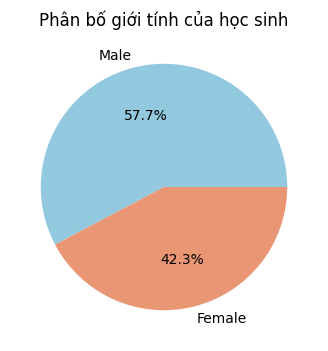

In [ ]:
gender_distribution = df['Gender'].value_counts()

plt.figure(figsize=(6, 4))
gender_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['#93C9DF', '#E99675'])
plt.title('Phân bố giới tính của học sinh')
plt.ylabel('')
plt.show()


1. Miêu tả biểu đồ

  Biểu đồ này là một biểu đồ tròn (pie chart) thể hiện phân bố giới tính của học sinh trong tập dữ liệu. Trục y không có nhãn, và các phần trong biểu đồ được tô màu với các màu sắc khác nhau: màu xanh nhạt (#93C9DF) đại diện cho một giới tính, và màu cam (#E99675) đại diện cho giới tính còn lại. Biểu đồ cũng hiển thị phần trăm của mỗi giới tính trong dữ liệu, với các giá trị phần trăm được làm tròn đến một chữ số thập phân.

2. Nhận xét biểu đồ

  Biểu đồ tròn này giúp chúng ta nhận diện rõ tỷ lệ giới tính của học sinh trong tập dữ liệu. Với mỗi phần của biểu đồ, chúng ta có thể dễ dàng xác định được sự phân bố giữa các giới tính, nhờ vào tỷ lệ phần trăm được hiển thị trực tiếp. Dựa vào màu sắc, người xem có thể nhanh chóng nhận ra tỉ lệ giữa các nhóm giới tính. Biểu đồ này rất dễ hiểu và thể hiện rõ tỷ lệ phân chia giới tính, giúp người dùng có cái nhìn tổng quan về giới tính trong tập dữ liệu.

3. Kết luận

  Biểu đồ này giúp xác định sự cân bằng hoặc sự chênh lệch giữa các giới tính trong tập dữ liệu. Nếu tỷ lệ giữa các giới tính chênh lệch nhiều, có thể cần cân nhắc lại các yếu tố như sự phân bổ mẫu hay các yếu tố ngoài dữ liệu. Biểu đồ tròn giúp cung cấp một cái nhìn trực quan về sự phân bố giới tính, có thể hỗ trợ cho các phân tích sâu hơn về sự khác biệt giới tính trong các yếu tố học tập hoặc các hoạt động khác.

#Kết nối Internet vs Điểm thi

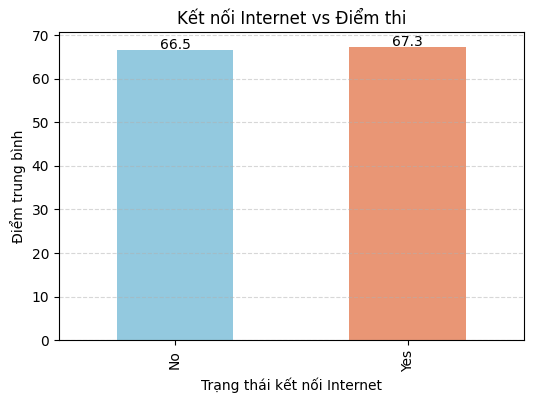

In [ ]:
internet_score = df.groupby('Internet_Access')['Exam_Score'].mean()

plt.figure(figsize=(6, 4))
ax = internet_score.plot(kind='bar', color=['#93C9DF', '#E99675'], legend=False)

for index, value in enumerate(internet_score.values):
    plt.text(index, value + 0.2, f'{value:.1f}', ha='center', fontsize=10)

plt.title('Kết nối Internet vs Điểm thi')
plt.xlabel('Trạng thái kết nối Internet')
plt.ylabel('Điểm trung bình')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


1. Miêu tả biểu đồ
  
  Biểu đồ này là một biểu đồ cột (bar chart) thể hiện mối quan hệ giữa trạng thái kết nối Internet và điểm thi trung bình của học sinh. Trục x đại diện cho hai giá trị trong biến "Internet_Access" (kết nối internet có hoặc không), còn trục y thể hiện điểm thi trung bình của nhóm học sinh trong mỗi nhóm kết nối. Các cột được tô màu với hai màu khác nhau: màu xanh nhạt (#93C9DF) cho nhóm học sinh có kết nối Internet và màu cam (#E99675) cho nhóm học sinh không có kết nối Internet. Số liệu điểm thi trung bình được hiển thị phía trên mỗi cột.

2. Nhận xét biểu đồ
  
  Biểu đồ cho thấy sự khác biệt trong điểm thi trung bình giữa học sinh có và không có kết nối Internet. Học sinh có kết nối Internet thường có điểm thi trung bình cao hơn so với học sinh không có kết nối. Điều này cho thấy rằng khả năng truy cập Internet có thể có ảnh hưởng tích cực đến hiệu quả học tập. Các giá trị điểm thi trung bình cũng được hiển thị trên mỗi cột, giúp người xem dễ dàng so sánh sự khác biệt giữa các nhóm.

3. Kết luận
  
  Biểu đồ này cho thấy một xu hướng rõ rệt rằng học sinh có kết nối Internet thường có điểm thi trung bình cao hơn. Điều này có thể chỉ ra rằng việc có quyền truy cập vào tài nguyên học tập trực tuyến và các công cụ học tập trên Internet có thể hỗ trợ học sinh cải thiện kết quả học tập của họ. Tuy nhiên, để khẳng định mối quan hệ này một cách chắc chắn, cần phải thực hiện thêm các nghiên cứu sâu hơn, kiểm tra các yếu tố khác tác động đến điểm thi.

#Kết nối Internet vs Giới tính

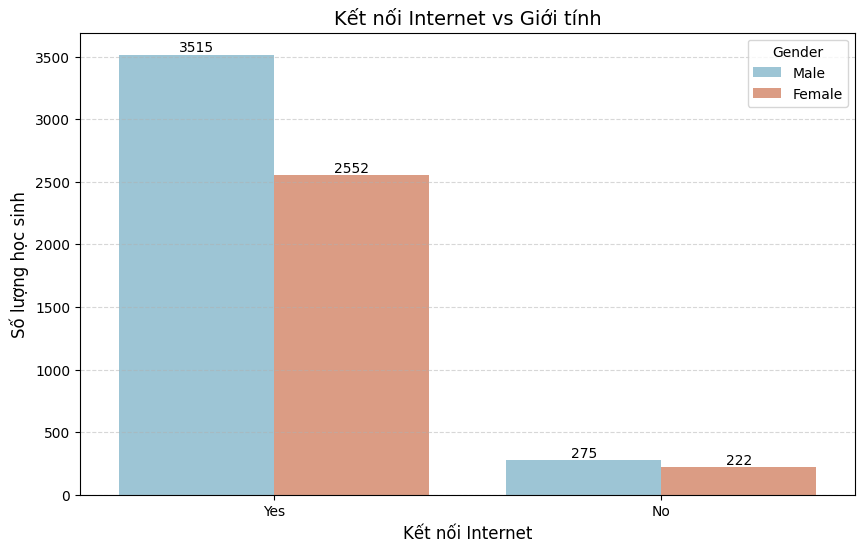

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Internet_Access', hue='Gender', palette=['#93C9DF', '#E99675'])

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

plt.title('Kết nối Internet vs Giới tính', fontsize=14)
plt.xlabel('Kết nối Internet', fontsize=12)
plt.ylabel('Số lượng học sinh', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

1. Miêu tả biểu đồ
  
  Biểu đồ này là một biểu đồ cột đếm (count plot) để thể hiện mối quan hệ giữa trạng thái kết nối Internet và giới tính của học sinh. Trục x thể hiện hai giá trị của biến "Internet_Access" (học sinh có hoặc không có kết nối Internet), trong khi trục y thể hiện số lượng học sinh trong mỗi nhóm kết nối. Biểu đồ sử dụng hai màu sắc khác nhau: màu xanh nhạt (#93C9DF) đại diện cho nữ và màu cam (#E99675) đại diện cho nam. Các giá trị đếm số học sinh được hiển thị trên mỗi cột.

2. Nhận xét biểu đồ
  
  Biểu đồ cho thấy phân bố số lượng học sinh có kết nối Internet và không có kết nối Internet theo giới tính. Số lượng học sinh nữ và nam có kết nối Internet khá tương đồng, với một lượng học sinh nam và nữ tương đương nhau trong mỗi nhóm. Điều này cho thấy rằng không có sự phân biệt rõ rệt về giới tính trong việc sử dụng kết nối Internet. Số lượng học sinh có kết nối Internet cao hơn đáng kể so với số lượng học sinh không có kết nối Internet trong cả hai giới tính, cho thấy xu hướng học sinh có kết nối Internet là phổ biến hơn.

3. Kết luận
  
  Biểu đồ này cho thấy rằng việc có kết nối Internet không phân biệt nhiều giữa giới tính của học sinh. Tuy nhiên, số lượng học sinh có kết nối Internet vượt trội hơn so với nhóm học sinh không có kết nối. Điều này có thể phản ánh sự phổ biến của việc sử dụng Internet trong học tập của học sinh và không có sự phân biệt lớn về giới tính trong việc tiếp cận các công cụ học tập trực tuyến.

#Ảnh hưởng của bạn bè đến kết quả học tập

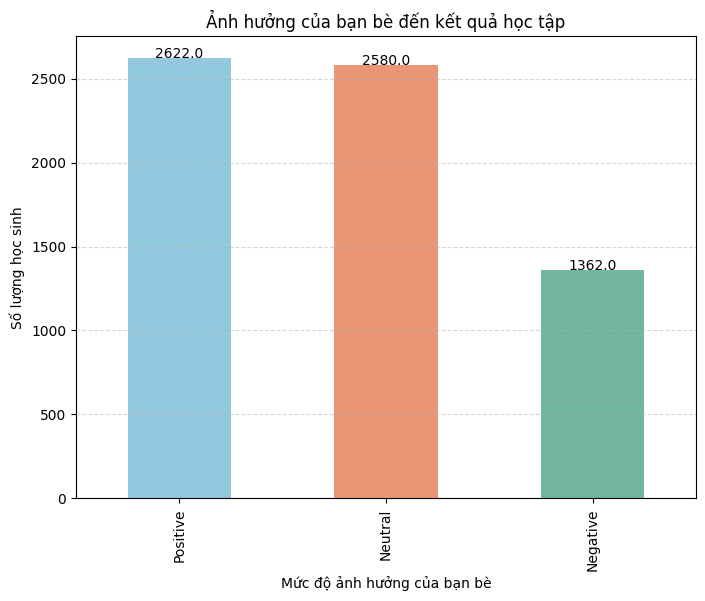

In [ ]:
peer_influence_count = df['Peer_Influence'].value_counts()
plt.figure(figsize=(8, 6))

ax = peer_influence_count.plot(kind='bar', color=['#93C9DF', '#E99675', '#72B6A1'])
for index, value in enumerate(peer_influence_count.values):
    plt.text(index, value + 0.5, f'{value:.1f}', ha='center', fontsize=10)

peer_influence_count.plot(kind='bar', color=['#93C9DF', '#E99675', '#72B6A1'])
plt.title('Ảnh hưởng của bạn bè đến kết quả học tập')
plt.xlabel('Mức độ ảnh hưởng của bạn bè')
plt.ylabel('Số lượng học sinh')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


1. Miêu tả biểu đồ
  
  Biểu đồ là một biểu đồ cột thể hiện sự phân bố của mức độ ảnh hưởng của bạn bè đến kết quả học tập của học sinh. Trục x thể hiện ba mức độ ảnh hưởng của bạn bè, với các giá trị cụ thể như 'Positive', 'Neutral', và 'Negative'. Trục y thể hiện số lượng học sinh trong mỗi nhóm. Các cột trong biểu đồ có ba màu sắc khác nhau: màu xanh nhạt (#93C9DF) cho nhóm có ảnh hưởng tích cực, màu cam (#E99675) cho nhóm có ảnh hưởng trung lập, và màu xanh lá (#72B6A1) cho nhóm có ảnh hưởng tiêu cực. Các giá trị đếm số lượng học sinh được hiển thị phía trên mỗi cột.

2. Nhận xét biểu đồ
  
  Biểu đồ cho thấy rằng ảnh hưởng của bạn bè đến kết quả học tập của học sinh chủ yếu tập trung vào mức độ trung bình và cao. Mức độ ảnh hưởng tiêu cực có số lượng học sinh thấp nhất, trong khi số lượng học sinh có mức độ ảnh hưởng trung lập và tích cực khá cân bằng. Điều này cho thấy rằng phần lớn học sinh cho rằng bạn bè có ảnh hưởng đáng kể đến kết quả học tập của họ. Việc ảnh hưởng của bạn bè đến học tập được phân chia rõ rệt theo ba mức độ, và có vẻ như ảnh hưởng trung bình và cao là phổ biến hơn.

3. Kết luận
  
  Biểu đồ này cho thấy ảnh hưởng của bạn bè đến kết quả học tập của học sinh khá lớn, với đa số học sinh cho rằng bạn bè có một mức độ ảnh hưởng trung bình hoặc cao. Mức độ ảnh hưởng thấp có vẻ ít phổ biến hơn, phản ánh rằng phần lớn học sinh cảm nhận được sự ảnh hưởng của bạn bè đối với học tập.

#Thu nhập gia đình vs Điểm thi trung bình

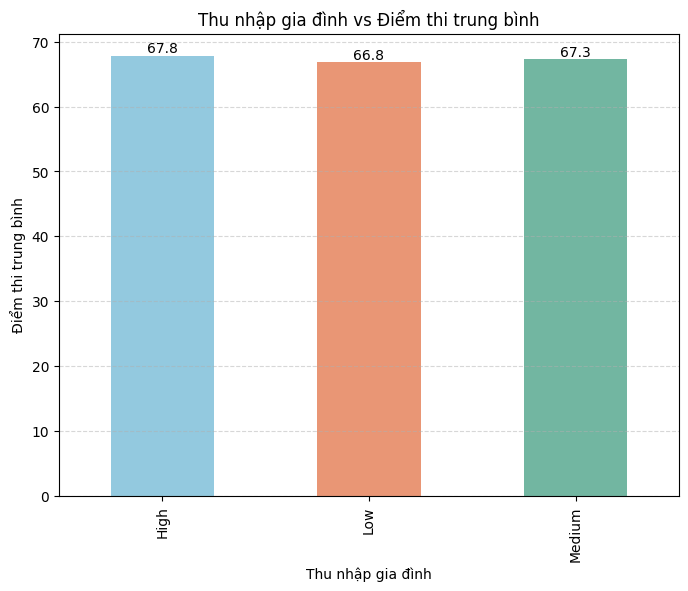

In [ ]:
income_score = df.groupby('Family_Income')['Exam_Score'].mean()
plt.figure(figsize=(8, 6))

ax = income_score.plot(kind='bar', color=['#93C9DF', '#E99675', '#72B6A1'])
for index, value in enumerate(income_score.values):
    plt.text(index, value + 0.5, f'{value:.1f}', ha='center', fontsize=10)

income_score.plot(kind='bar', color=['#93C9DF', '#E99675', '#72B6A1'])
plt.title('Thu nhập gia đình vs Điểm thi trung bình')
plt.xlabel('Thu nhập gia đình')
plt.ylabel('Điểm thi trung bình')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

1. Miêu tả biểu đồ
  
  Biểu đồ là một biểu đồ cột thể hiện mối quan hệ giữa thu nhập gia đình và điểm thi trung bình của học sinh. Trục x thể hiện các mức thu nhập gia đình khác nhau, có thể chia thành ba nhóm: thấp, trung bình và cao. Trục y thể hiện điểm thi trung bình của học sinh tương ứng với các nhóm thu nhập. Các cột trong biểu đồ được phân biệt bằng ba màu sắc: màu xanh nhạt (#93C9DF) cho thu nhập thấp, màu cam (#E99675) cho thu nhập trung bình và màu xanh lá (#72B6A1) cho thu nhập cao. Các giá trị điểm thi trung bình được hiển thị ở phía trên mỗi cột.

2. Nhận xét biểu đồ
  
  Biểu đồ cho thấy mối quan hệ giữa thu nhập gia đình và điểm thi trung bình của học sinh có xu hướng tăng dần khi thu nhập gia đình cao hơn. Nhóm có thu nhập cao có điểm thi trung bình cao nhất, trong khi nhóm có thu nhập thấp có điểm thi trung bình thấp nhất. Điều này có thể phản ánh ảnh hưởng của điều kiện kinh tế gia đình đến kết quả học tập của học sinh, với các gia đình có thu nhập cao có thể cung cấp nhiều tài nguyên và cơ hội học tập tốt hơn cho con em họ.

3. Kết luận
  
  Biểu đồ này chỉ ra rằng thu nhập gia đình có thể có ảnh hưởng rõ rệt đến điểm thi trung bình của học sinh. Những học sinh có gia đình có thu nhập cao có xu hướng đạt điểm thi trung bình cao hơn, trong khi học sinh có gia đình thu nhập thấp thường có điểm thi thấp hơn. Điều này cho thấy sự chênh lệch về điều kiện kinh tế gia đình có thể ảnh hưởng đến cơ hội học tập và kết quả học tập của học sinh.

#Trình độ học vấn của phụ huynh

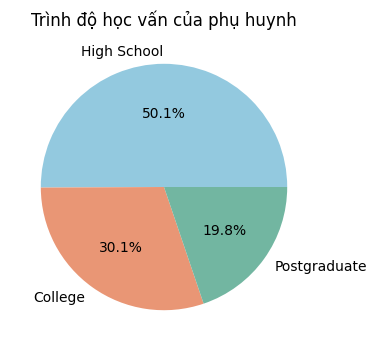

In [ ]:
parental_education = df['Parental_Education_Level'].value_counts()

plt.figure(figsize=(6, 4))
parental_education.plot(kind='pie', autopct='%1.1f%%', colors=['#93C9DF', '#E99675', '#72B6A1'])
plt.title('Trình độ học vấn của phụ huynh')
plt.ylabel('')
plt.show()

1. Miêu tả biểu đồ

  Biểu đồ là một biểu đồ tròn thể hiện phân bố trình độ học vấn của phụ huynh trong bộ dữ liệu. Biểu đồ sử dụng ba màu sắc khác nhau: màu xanh nhạt (#93C9DF), màu cam (#E99675) và màu xanh lá (#72B6A1), mỗi màu tương ứng với một mức độ trình độ học vấn khác nhau của phụ huynh. Tỷ lệ phần trăm của mỗi nhóm được thể hiện rõ ràng trên các phần của biểu đồ, cho biết sự phân bổ của các nhóm học vấn trong tổng số.

2. Nhận xét biểu đồ

  Biểu đồ cho thấy một sự phân bố rõ ràng về trình độ học vấn của phụ huynh. Nếu các nhóm trình độ học vấn được phân bổ đồng đều, biểu đồ sẽ có các phần tương đối bằng nhau. Tuy nhiên, nếu một nhóm trình độ học vấn chiếm ưu thế hơn, phần biểu đồ của nhóm đó sẽ lớn hơn các nhóm còn lại. Các tỷ lệ phần trăm cung cấp thông tin cụ thể về mức độ phổ biến của từng nhóm trình độ học vấn trong bộ dữ liệu.

3. Kết luận

  Biểu đồ này giúp chúng ta hiểu được sự phân bố trình độ học vấn của phụ huynh trong bộ dữ liệu. Việc phân tích trình độ học vấn của phụ huynh có thể cung cấp thông tin quan trọng về yếu tố gia đình, có thể ảnh hưởng đến kết quả học tập của học sinh. Biểu đồ này giúp ta nhận ra các xu hướng hoặc sự phân bố không đồng đều trong trình độ học vấn của phụ huynh.

#Trình độ học vấn của phụ huynh vs Điểm thi trung bình

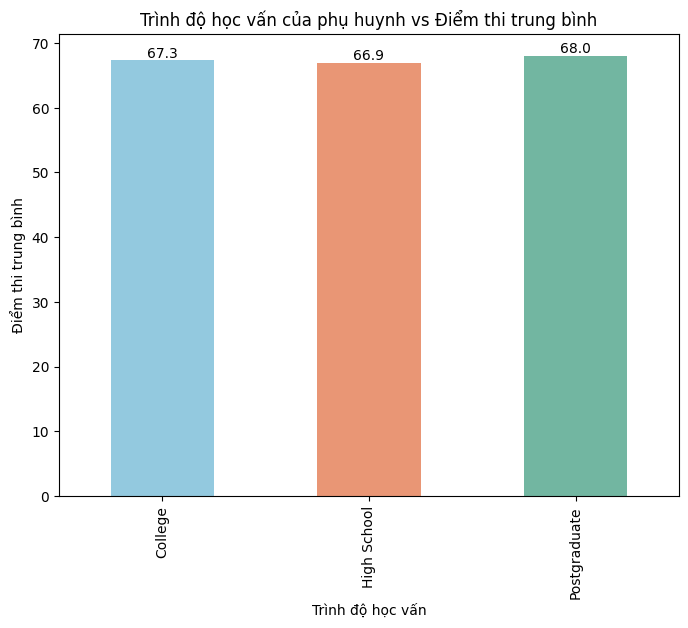

In [ ]:
education_score = df.groupby('Parental_Education_Level')['Exam_Score'].mean()
plt.figure(figsize=(8, 6))

ax = education_score.plot(kind='bar', color=['#93C9DF', '#E99675', '#72B6A1'])
for index, value in enumerate(education_score.values):
    plt.text(index, value + 0.5, f'{value:.1f}', ha='center', fontsize=10)

education_score.plot(kind='bar', color=['#93C9DF', '#E99675', '#72B6A1'])
plt.title('Trình độ học vấn của phụ huynh vs Điểm thi trung bình')
plt.xlabel('Trình độ học vấn')
plt.ylabel('Điểm thi trung bình')
plt.show()

1. Miêu tả biểu đồ

  Biểu đồ này là biểu đồ cột thể hiện mối quan hệ giữa trình độ học vấn của phụ huynh và điểm thi trung bình của học sinh. Trình độ học vấn của phụ huynh được phân loại thành ba mức độ, với mỗi mức độ có một màu sắc khác nhau: màu xanh nhạt (#93C9DF), màu cam (#E99675), và màu xanh lá (#72B6A1). Trục x của biểu đồ đại diện cho các mức độ trình độ học vấn, còn trục y đại diện cho điểm thi trung bình của học sinh. Mỗi cột biểu thị điểm thi trung bình của học sinh theo từng nhóm trình độ học vấn của phụ huynh.

2. Nhận xét biểu đồ

  Biểu đồ cho thấy sự thay đổi của điểm thi trung bình giữa các nhóm trình độ học vấn của phụ huynh. Các cột có độ cao khác nhau, biểu thị sự khác biệt về điểm thi trung bình của học sinh giữa các nhóm. Các nhóm có trình độ học vấn cao hơn có thể có điểm thi trung bình cao hơn hoặc thấp hơn so với các nhóm có trình độ học vấn thấp hơn, tùy thuộc vào dữ liệu cụ thể. Các con số được hiển thị trên đỉnh mỗi cột giúp người xem dễ dàng nhận biết giá trị điểm thi trung bình của từng nhóm.

3. Kết luận

  Biểu đồ này giúp chúng ta đánh giá mối quan hệ giữa trình độ học vấn của phụ huynh và điểm thi trung bình của học sinh. Mặc dù không thể kết luận chắc chắn từ biểu đồ này rằng trình độ học vấn của phụ huynh có tác động trực tiếp đến điểm thi, nhưng nó cho thấy các nhóm học sinh có phụ huynh với trình độ học vấn khác nhau có sự phân bố điểm thi trung bình khác nhau. Phân tích thêm các yếu tố khác có thể giúp làm rõ mối liên hệ này.

#Trình độ học vấn của phụ huynh vs Hoạt động ngoại khóa

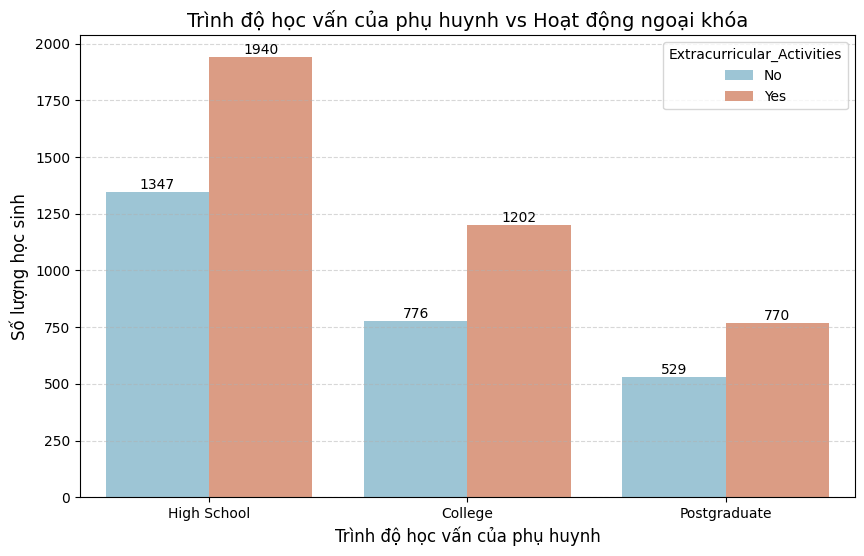

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Parental_Education_Level', hue='Extracurricular_Activities', palette=['#93C9DF', '#E99675'])

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

plt.title('Trình độ học vấn của phụ huynh vs Hoạt động ngoại khóa', fontsize=14)
plt.xlabel('Trình độ học vấn của phụ huynh', fontsize=12)
plt.ylabel('Số lượng học sinh', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

1. Miêu tả biểu đồ

  Biểu đồ cột nhóm này thể hiện mối quan hệ giữa trình độ học vấn của phụ huynh và sự tham gia của học sinh vào các hoạt động ngoại khóa. Trình độ học vấn của phụ huynh được chia thành các nhóm và hiển thị trên trục x. Trục y biểu thị số lượng học sinh trong mỗi nhóm trình độ học vấn, với hai màu sắc khác nhau đại diện cho việc tham gia hay không tham gia hoạt động ngoại khóa. Các giá trị số học sinh trong mỗi nhóm được hiển thị ngay trên đỉnh của các cột.

2. Nhận xét biểu đồ

  Biểu đồ cho thấy sự phân bố của học sinh trong các nhóm trình độ học vấn của phụ huynh và sự tham gia vào các hoạt động ngoại khóa. Cột màu cam (#E99675) đại diện cho học sinh tham gia hoạt động ngoại khóa, trong khi cột màu xanh (#93C9DF) đại diện cho học sinh không tham gia. Sự phân bố của các cột có thể chỉ ra một xu hướng hoặc mối quan hệ giữa trình độ học vấn của phụ huynh và việc tham gia vào các hoạt động ngoại khóa.

3. Kết luận

  Biểu đồ cung cấp thông tin về sự tham gia của học sinh vào các hoạt động ngoại khóa dựa trên trình độ học vấn của phụ huynh. Mối quan hệ này có thể giúp ta hiểu rõ hơn về ảnh hưởng của môi trường gia đình đối với sự tham gia của học sinh vào các hoạt động ngoài lớp học.

#Loại trường học vs Thời gian học trung bình

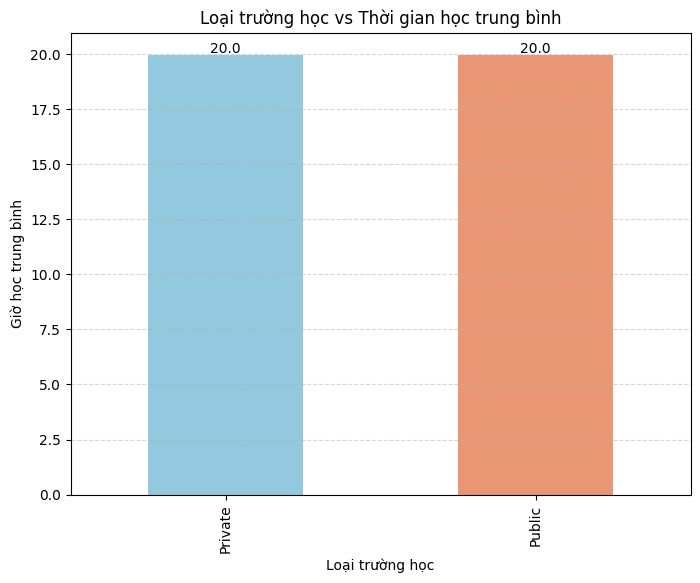

In [ ]:
school_hours = df.groupby('School_Type')['Hours_Studied'].mean()
plt.figure(figsize=(8, 6))
mid_index = len(school_hours) // 2
colors = ['#93C9DF'] * mid_index + ['#E99675'] * (len(school_hours) - mid_index)


ax = school_hours.plot(kind='bar', color=colors, legend=False)
for index, value in enumerate(school_hours.values):
    plt.text(index, value + 0.1, f'{value:.1f}', ha='center', fontsize=10)

plt.title('Loại trường học vs Thời gian học trung bình')
plt.xlabel('Loại trường học')
plt.ylabel('Giờ học trung bình')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

1. Miêu tả biểu đồ

  Biểu đồ trên là biểu đồ cột (bar plot), thể hiện thời gian học trung bình (Hours_Studied) theo loại trường học (School_Type). Trục hoành biểu diễn hai loại trường học: Công lập (Public) và Tư thục (Private), trong khi trục tung biểu diễn thời gian học trung bình của học sinh tại mỗi loại trường. Các cột có màu sắc khác nhau, với trường công lập được thể hiện bằng màu xanh nhạt và trường tư thục bằng màu cam. Các giá trị thời gian học trung bình được hiển thị trên đỉnh mỗi cột.

2. Nhận xét chi tiết

  Sự khác biệt về thời gian học giữa hai loại trường học: Biểu đồ cho thấy học sinh trường tư thục học nhiều hơn so với học sinh trường công lập. Sự khác biệt này có thể phản ánh một môi trường học tập mà học sinh trường tư thục có điều kiện học tập tốt hơn hoặc có sự hỗ trợ học tập ngoài giờ nhiều hơn. Điều này có thể liên quan đến các nguồn lực tài chính, cơ sở vật chất, và chương trình học tại các trường tư thục.

  Thời gian học trung bình ở mỗi loại trường: Trường tư thục có thời gian học trung bình cao hơn, có thể do học sinh có cơ hội học nhiều hơn hoặc cần học nhiều hơn để đáp ứng yêu cầu học tập. Trong khi đó, học sinh trường công lập có thể gặp khó khăn hơn trong việc duy trì thời gian học tập dài do các yếu tố như kích thước lớp học lớn hơn hoặc thiếu hỗ trợ học tập ngoài giờ.

3. Kết luận

  Biểu đồ chỉ ra rằng học sinh trường tư thục dành nhiều thời gian học hơn học sinh trường công lập. Điều này có thể phản ánh sự khác biệt trong các cơ hội học tập hoặc môi trường học tập giữa hai loại trường. Các trường công lập có thể cần cải thiện các chương trình học và hỗ trợ học tập để nâng cao thời gian học của học sinh và kết quả học tập của họ.

#Loại trường học vs Số buổi học thêm trung bình

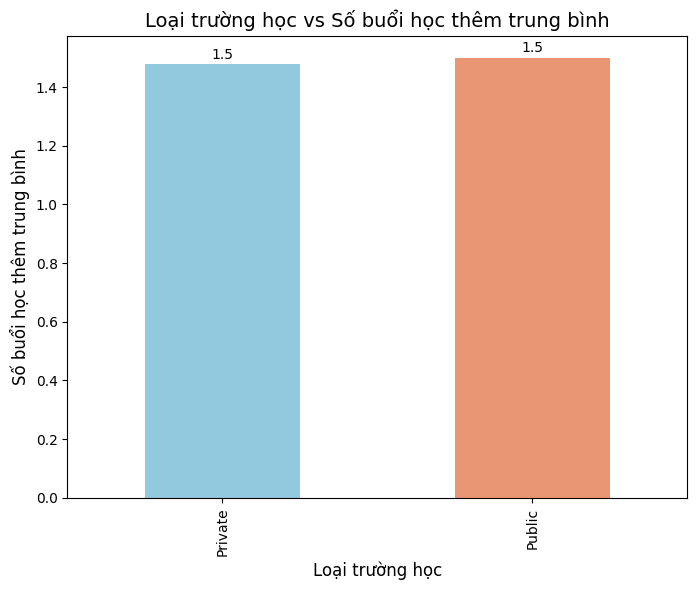

In [ ]:
school_tutoring = df.groupby('School_Type')['Tutoring_Sessions'].mean()
plt.figure(figsize=(8, 6))
mid_index = len(school_hours) // 2
colors = ['#93C9DF'] * mid_index + ['#E99675'] * (len(school_hours) - mid_index)


ax = school_tutoring.plot(kind='bar', color=colors, legend=False)
for index, value in enumerate(school_tutoring.values):
    plt.text(index, value + 0.02, f'{value:.1f}', ha='center', fontsize=10)

plt.title('Loại trường học vs Số buổi học thêm trung bình', fontsize=14)
plt.xlabel('Loại trường học', fontsize=12)
plt.ylabel('Số buổi học thêm trung bình', fontsize=12)
plt.show()

1. Miêu tả biểu đồ

  Biểu đồ trên là biểu đồ cột (bar plot), thể hiện số buổi học thêm trung bình (Tutoring_Sessions) theo loại trường học (School_Type). Trục hoành biểu diễn hai loại trường học: Công lập (Public) và Tư thục (Private), trong khi trục tung biểu diễn số buổi học thêm trung bình của học sinh ở mỗi loại trường. Các cột có màu sắc khác nhau: trường công lập được thể hiện bằng màu xanh nhạt và trường tư thục bằng màu cam. Giá trị số buổi học thêm trung bình được hiển thị trên đỉnh mỗi cột.

2. Nhận xét chi tiết
  
  Sự khác biệt giữa hai loại trường học: Biểu đồ cho thấy học sinh trường tư thục tham gia nhiều buổi học thêm hơn học sinh trường công lập. Điều này có thể phản ánh sự khác biệt về khả năng tài chính hoặc các chương trình bổ sung tại trường tư thục, nơi có thể dễ dàng tổ chức các buổi học thêm cho học sinh. Trái lại, các trường công lập có thể gặp khó khăn trong việc tổ chức các hoạt động bổ sung do hạn chế về nguồn lực.

  Sự phân bổ số buổi học thêm: Số buổi học thêm trung bình tại các trường tư thục cao hơn, cho thấy trường tư thục có thể cung cấp các cơ hội học tập ngoài giờ nhiều hơn, giúp học sinh cải thiện kiến thức và kết quả học tập. Các trường công lập có thể cần cải thiện các dịch vụ bổ sung để tạo điều kiện cho học sinh có cơ hội học thêm nhiều hơn.

3. Kết luận

  Biểu đồ chỉ ra rằng học sinh trường tư thục tham gia nhiều buổi học thêm hơn học sinh trường công lập. Điều này có thể là do các yếu tố như tài chính và chương trình hỗ trợ học tập tại các trường tư thục, trong khi các trường công lập có thể cần cải thiện các chương trình học bổ sung để hỗ trợ học sinh.

#Điểm thi trung bình theo loại trường học

<ipython-input-119-1e0d00ef5b52>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='School_Type', y='Avg_Score_By_School', data=df, palette=['#93C9DF', '#E99675'])


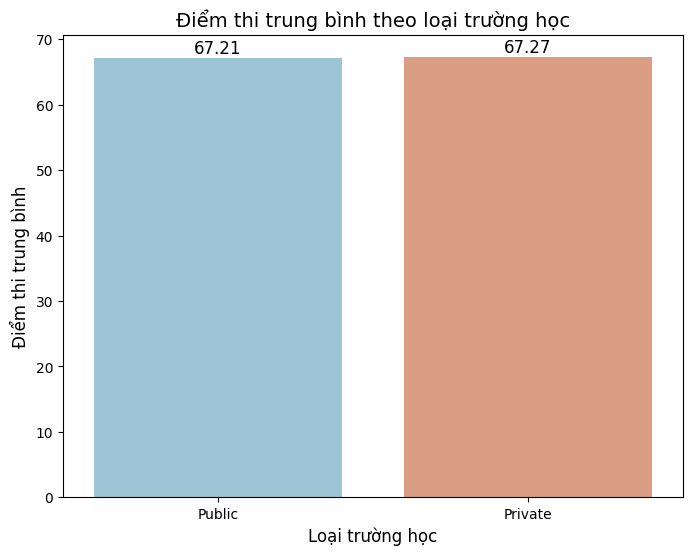

In [ ]:
df['School_Type'] = df['School_Type']

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='School_Type', y='Avg_Score_By_School', data=df, palette=['#93C9DF', '#E99675'])

plt.title('Điểm thi trung bình theo loại trường học', fontsize=14)
plt.xlabel('Loại trường học', fontsize=12)
plt.ylabel('Điểm thi trung bình', fontsize=12)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 7), textcoords='offset points')

plt.xticks(ticks=[0, 1], labels=['Public', 'Private'])
plt.show()

1. Miêu tả biểu đồ

  Biểu đồ trên là biểu đồ cột (bar plot), thể hiện điểm thi trung bình (Avg_Score_By_School) theo loại trường học (School_Type). Trục hoành biểu diễn hai loại trường học: Công lập (Public) và Tư thục (Private), trong khi trục tung biểu diễn điểm thi trung bình của học sinh trong mỗi loại trường. Các cột có màu sắc khác nhau (xanh nhạt cho trường công lập và cam cho trường tư thục). Các giá trị điểm thi trung bình được hiển thị trên đỉnh mỗi cột.

2. Nhận xét chi tiết

  Sự khác biệt giữa hai loại trường: Biểu đồ cho thấy học sinh trường tư thục đạt điểm thi trung bình cao hơn học sinh trường công lập. Điều này có thể phản ánh sự khác biệt trong cơ sở vật chất, chất lượng giảng dạy hoặc các yếu tố khác ảnh hưởng đến quá trình học tập tại các loại trường khác nhau.

  Sự phân bố điểm thi: Học sinh trường tư thục có điểm thi trung bình cao hơn, điều này có thể chỉ ra rằng trường tư thục cung cấp một môi trường học tập chất lượng hơn hoặc có sự đầu tư nhiều hơn vào việc hỗ trợ học sinh. Trong khi đó, học sinh trường công lập có điểm thi trung bình thấp hơn, có thể là do các yếu tố khác như tài chính hạn chế hoặc số lượng học sinh lớn hơn ảnh hưởng đến chất lượng giảng dạy.

  Khả năng nâng cao chất lượng học tập: Mặc dù có sự khác biệt rõ rệt về điểm thi trung bình, các trường công lập có thể cải thiện kết quả học tập của học sinh thông qua việc cải thiện chất lượng giảng dạy, đầu tư vào cơ sở vật chất, và các hỗ trợ học tập thêm.

3. Kết luận

  Biểu đồ cho thấy sự khác biệt về điểm thi trung bình giữa học sinh trường công lập và tư thục, với học sinh trường tư thục có điểm thi trung bình cao hơn. Điều này gợi ý rằng môi trường học tập tại trường tư thục có thể tốt hơn, tuy nhiên, các trường công lập có thể cải thiện kết quả học tập của học sinh bằng cách tăng cường chất lượng giảng dạy và cơ sở vật chất.

#Tương tác giữa loại trường học và thời gian học

<ipython-input-120-d7fdcfb8d60f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='School_Hours_Interaction', data=df, palette='Set2')
<ipython-input-120-d7fdcfb8d60f>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([label_mapping.get(label.get_text(), label.get_text()) for label in ax.get_xticklabels()])


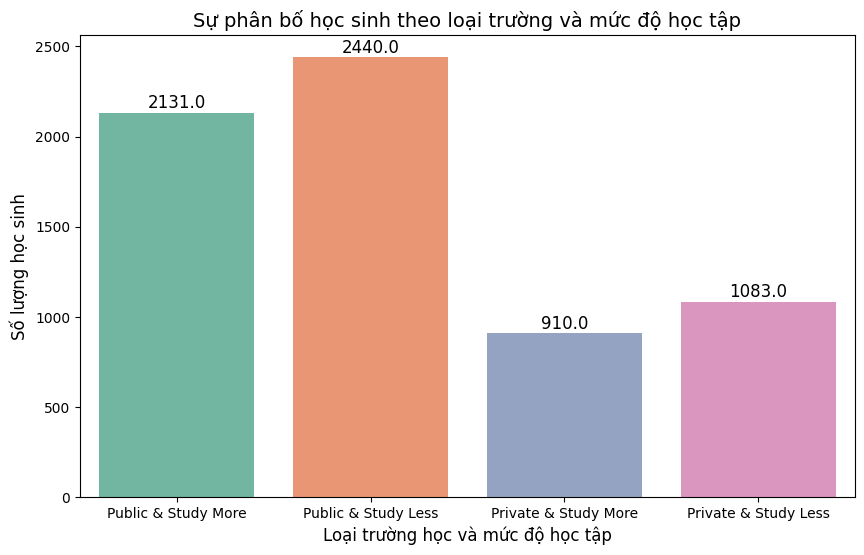

In [ ]:
df['School_Hours_Interaction'] = df['School_Type'].astype(str) + "_" + (df['Hours_Studied'] > df['Hours_Studied'].median()).astype(str)

label_mapping = {
    'Private_True': 'Private & Study More',
    'Private_False': 'Private & Study Less',
    'Public_True': 'Public & Study More',
    'Public_False': 'Public & Study Less'
}
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='School_Hours_Interaction', data=df, palette='Set2')
ax.set_xticklabels([label_mapping.get(label.get_text(), label.get_text()) for label in ax.get_xticklabels()])

plt.title('Sự phân bố học sinh theo loại trường và mức độ học tập', fontsize=14)
plt.xlabel('Loại trường học và mức độ học tập', fontsize=12)
plt.ylabel('Số lượng học sinh', fontsize=12)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 7), textcoords='offset points')
plt.show()


1. Miêu tả biểu đồ

  Biểu đồ trên là biểu đồ cột (countplot), thể hiện sự phân bố học sinh theo hai yếu tố: loại trường học (School_Type) và mức độ học tập (Hours_Studied). Trục hoành biểu diễn sự kết hợp giữa các nhóm trường học (Tư thục và Công lập) và mức độ học tập (Học nhiều hoặc Học ít), trong khi trục tung biểu diễn số lượng học sinh trong mỗi nhóm. Các giá trị trên các cột thể hiện số lượng học sinh trong từng nhóm cụ thể.

2. Nhận xét chi tiết

  Sự phân bố học sinh: Biểu đồ cho thấy rõ sự phân chia giữa học sinh của trường tư thục và công lập theo mức độ học tập. Nhóm học sinh trường tư thục và học nhiều (Private & Study More) có số lượng lớn nhất, theo sau là nhóm trường công lập và học nhiều (Public & Study More). Các nhóm trường tư thục và học ít (Private & Study Less) và trường công lập và học ít (Public & Study Less) có số lượng thấp hơn.

  Mối quan hệ giữa loại trường học và thời gian học: Biểu đồ chỉ ra rằng học sinh trường tư thục có xu hướng học nhiều hơn so với học sinh trường công lập, dẫn đến sự phân bổ không đồng đều về số lượng học sinh giữa các nhóm. Điều này có thể phản ánh sự khác biệt về chương trình giảng dạy hoặc các yếu tố bên ngoài như môi trường học tập hoặc tài chính hỗ trợ.

  Sự chênh lệch giữa các nhóm: Sự chênh lệch rõ rệt giữa nhóm học sinh học nhiều và nhóm học sinh học ít trong cả hai loại trường học cho thấy mức độ học tập là yếu tố quan trọng trong việc quyết định số lượng học sinh ở mỗi nhóm. Việc học nhiều giúp học sinh đạt được kết quả học tập tốt hơn và có thể phản ánh ảnh hưởng của việc dành thời gian cho việc học.

3. Kết luận

  Biểu đồ cho thấy sự phân bố học sinh giữa các trường tư thục và công lập, cũng như mức độ học tập của họ. Học sinh trường tư thục có xu hướng học nhiều hơn so với học sinh trường công lập. Tuy nhiên, mức độ học tập là yếu tố quan trọng giúp phân định sự thành công học tập, và các nhóm học sinh học nhiều có xu hướng có số lượng lớn hơn.

#Chất lượng giáo viên vs Điểm thi trung bình

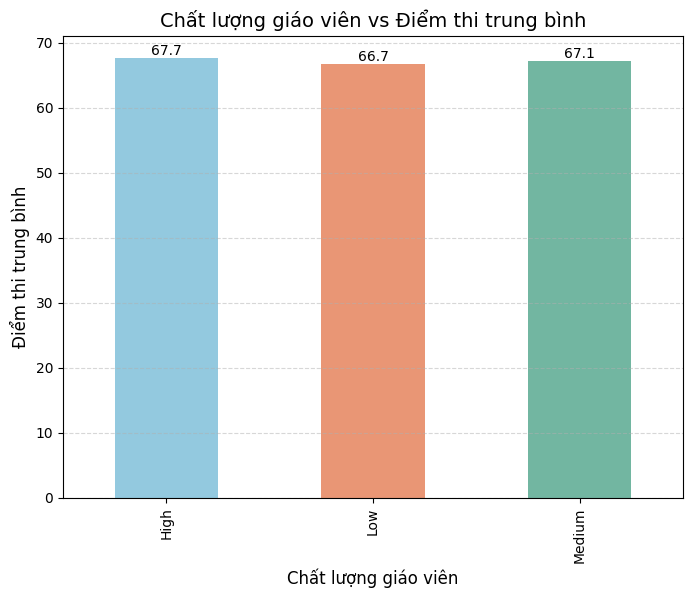

In [ ]:
teacher_score = df.groupby('Teacher_Quality')['Exam_Score'].mean()
plt.figure(figsize=(8, 6))

ax = teacher_score.plot(kind='bar', color=['#93C9DF', '#E99675', '#72B6A1'])
for index, value in enumerate(teacher_score.values):
    plt.text(index, value + 0.5, f'{value:.1f}', ha='center', fontsize=10)

plt.title('Chất lượng giáo viên vs Điểm thi trung bình', fontsize=14)
plt.xlabel('Chất lượng giáo viên', fontsize=12)
plt.ylabel('Điểm thi trung bình', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

1. Miêu tả biểu đồ

  Biểu đồ trên là biểu đồ cột (bar chart), thể hiện mối quan hệ giữa chất lượng giáo viên (Teacher_Quality) và điểm thi trung bình (Exam_Score). Trục hoành biểu diễn các nhóm chất lượng giáo viên khác nhau, trong khi trục tung biểu diễn điểm thi trung bình của học sinh trong từng nhóm. Các cột có màu sắc khác nhau, với giá trị điểm thi trung bình hiển thị trên đầu mỗi cột. Biểu đồ còn có lưới dọc theo trục y để làm rõ sự thay đổi giữa các mức độ.

2. Nhận xét chi tiết
  
  Mối quan hệ giữa chất lượng giáo viên và điểm thi: Biểu đồ cho thấy mối quan hệ rõ rệt giữa chất lượng giáo viên và điểm thi trung bình của học sinh. Các nhóm học sinh có giáo viên chất lượng cao có xu hướng đạt điểm thi trung bình cao hơn so với các nhóm học sinh có giáo viên chất lượng thấp hoặc trung bình. Điều này nhấn mạnh tầm quan trọng của chất lượng giáo viên đối với kết quả học tập của học sinh.

  Sự thay đổi giữa các nhóm: Sự khác biệt giữa các nhóm chất lượng giáo viên thể hiện rõ ràng, với nhóm có giáo viên chất lượng tốt nhất đạt điểm thi trung bình cao nhất. Sự phân biệt này càng khẳng định rằng giáo viên chất lượng cao có thể đóng góp rất lớn vào sự thành công học tập của học sinh.

  Hiệu quả của giáo viên: Các nhóm có giáo viên chất lượng thấp có điểm thi trung bình thấp hơn đáng kể, chỉ ra rằng giáo viên chất lượng thấp có thể không cung cấp đủ sự hỗ trợ hoặc phương pháp giảng dạy hiệu quả, ảnh hưởng đến kết quả học tập của học sinh.

3. Kết luận

  Chất lượng giáo viên có ảnh hưởng mạnh mẽ đến điểm thi trung bình của học sinh, với nhóm học sinh có giáo viên chất lượng cao đạt điểm thi tốt nhất. Điều này chỉ ra rằng việc nâng cao chất lượng giáo viên là một yếu tố quan trọng để cải thiện kết quả học tập của học sinh.

#Mức độ động lực vs Điểm thi trung bình

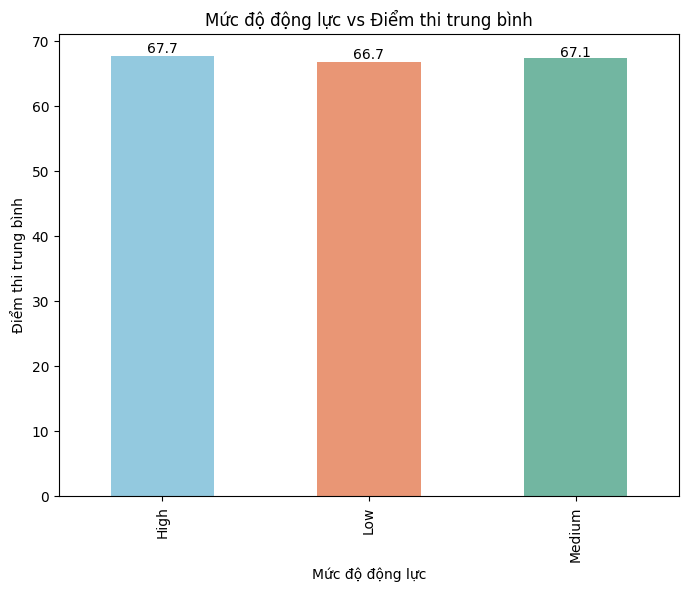

In [ ]:
motivation_score = df.groupby('Motivation_Level')['Exam_Score'].mean()
plt.figure(figsize=(8, 6))

ax = teacher_score.plot(kind='bar', color=['#93C9DF', '#E99675', '#72B6A1'])
for index, value in enumerate(teacher_score.values):
    plt.text(index, value + 0.5, f'{value:.1f}', ha='center', fontsize=10)

motivation_score.plot(kind='bar', color=['#93C9DF', '#E99675', '#72B6A1'])
plt.title('Mức độ động lực vs Điểm thi trung bình')
plt.xlabel('Mức độ động lực')
plt.ylabel('Điểm thi trung bình')
plt.show()

1. Miêu tả biểu đồ

  Biểu đồ trên là biểu đồ cột (bar chart), thể hiện mối quan hệ giữa mức độ động lực học tập (Motivation_Level) và điểm thi trung bình (Exam_Score). Trục hoành biểu diễn các nhóm mức độ động lực khác nhau, trong khi trục tung biểu diễn điểm thi trung bình của học sinh trong từng nhóm. Các cột có màu sắc khác nhau và có các giá trị điểm thi trung bình được hiển thị trên đầu mỗi cột.

2. Nhận xét chi tiết

  Mối quan hệ giữa động lực và điểm thi: Biểu đồ cho thấy mối quan hệ tích cực giữa mức độ động lực và điểm thi trung bình. Nhóm học sinh có động lực học tập cao nhất có điểm thi trung bình cao hơn so với các nhóm còn lại. Điều này cho thấy động lực học tập có thể có ảnh hưởng đáng kể đến kết quả học tập.

  Sự phân tán trong từng nhóm: Tuy nhiên, sự phân bố điểm thi trung bình giữa các nhóm không quá khác biệt, gợi ý rằng ngoài động lực, có thể có các yếu tố khác ảnh hưởng đến điểm thi như phương pháp học tập, sự hỗ trợ từ gia đình, hoặc chất lượng giáo viên.

  Nhóm động lực thấp và trung bình: Các nhóm có động lực học tập thấp và trung bình có điểm thi trung bình gần giống nhau, nhưng đều thấp hơn nhóm có động lực học tập cao, cho thấy rằng động lực có thể là yếu tố quan trọng đối với sự cải thiện điểm thi.

3. Kết luận

  Mức độ động lực học tập có ảnh hưởng rõ rệt đến điểm thi trung bình của học sinh, với nhóm học sinh có động lực cao đạt điểm thi trung bình tốt hơn. Tuy nhiên, để hiểu rõ hơn về sự ảnh hưởng của động lực, cần phải xem xét thêm các yếu tố khác có thể tác động đến kết quả học tập.

#Học sinh có và không có khuyết tật học tập

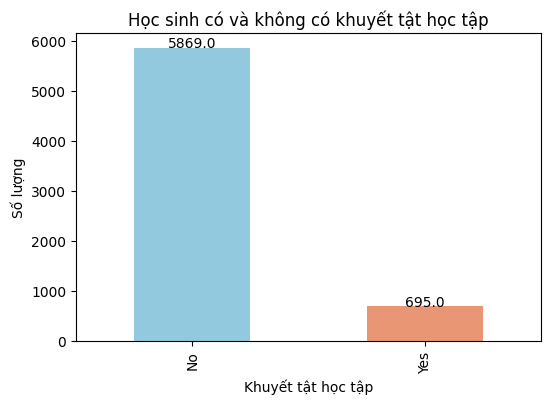

In [ ]:
disabilities_count = df['Learning_Disabilities'].value_counts()
plt.figure(figsize=(6, 4))

ax = disabilities_count.plot(kind='bar', color='#1f77b4')
for index, value in enumerate(disabilities_count.values):
    plt.text(index, value + 0.05, f'{value:.1f}', ha='center', fontsize=10)

disabilities_count.plot(kind='bar', color=['#93C9DF', '#E99675'])
plt.title('Học sinh có và không có khuyết tật học tập')
plt.xlabel('Khuyết tật học tập')
plt.ylabel('Số lượng')
plt.show()

1. Miêu tả biểu đồ

  Biểu đồ trên là biểu đồ cột (bar chart), thể hiện số lượng học sinh có và không có khuyết tật học tập (Learning_Disabilities). Trục hoành biểu diễn hai nhóm: có khuyết tật và không có khuyết tật, trong khi trục tung biểu diễn số lượng học sinh trong từng nhóm. Các cột có màu sắc khác nhau, và số lượng học sinh được hiển thị trên đầu mỗi cột.

2. Nhận xét chi tiết
  
  Sự phân bố học sinh: Biểu đồ cho thấy phần lớn học sinh trong tập dữ liệu không có khuyết tật học tập, với số lượng học sinh trong nhóm này lớn hơn rõ rệt so với nhóm có khuyết tật. Điều này chỉ ra rằng đa số học sinh trong trường không gặp phải các vấn đề liên quan đến khuyết tật học tập.

  Sự chênh lệch giữa hai nhóm: Sự chênh lệch giữa số lượng học sinh có và không có khuyết tật học tập khá rõ ràng, cho thấy rằng tỉ lệ học sinh có khuyết tật học tập là ít hơn. Điều này cũng có thể phản ánh sự phân bố chung của học sinh trong các trường học.

  Chú thích số liệu: Các số liệu được hiển thị trực tiếp trên cột, giúp người xem dễ dàng nhận diện số lượng học sinh trong mỗi nhóm. Các giá trị này mang lại cái nhìn rõ ràng về sự phân bố.

3. Kết luận
  
  Phần lớn học sinh trong dữ liệu không gặp phải khuyết tật học tập, trong khi số lượng học sinh có khuyết tật học tập ít hơn nhiều. Biểu đồ cung cấp cái nhìn tổng quan về sự phân bố học sinh theo khuyết tật học tập và có thể là cơ sở để tìm hiểu thêm về các yếu tố ảnh hưởng đến kết quả học tập của nhóm học sinh có khuyết tật học tập.

#Khoảng cách từ nhà đến trường vs Điểm thi trung bình

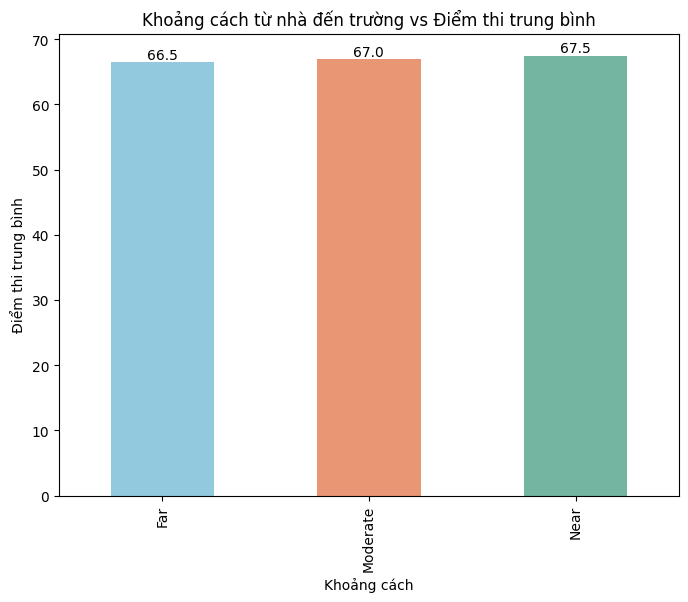

In [ ]:
distance_score = df.groupby('Distance_from_Home')['Exam_Score'].mean()
plt.figure(figsize=(8, 6))

ax = distance_score.plot(kind='bar', color=['#93C9DF', '#E99675', '#72B6A1'])
for index, value in enumerate(distance_score.values):
    plt.text(index, value + 0.5, f'{value:.1f}', ha='center', fontsize=10)

distance_score.plot(kind='bar', color=['#93C9DF', '#E99675', '#72B6A1'], alpha=0.7)
plt.title('Khoảng cách từ nhà đến trường vs Điểm thi trung bình')
plt.xlabel('Khoảng cách')
plt.ylabel('Điểm thi trung bình')
plt.show()


1. Miêu tả biểu đồ

  Biểu đồ trên là biểu đồ cột (bar chart), thể hiện mối quan hệ giữa khoảng cách từ nhà đến trường (Distance_from_Home) và điểm thi trung bình (Exam_Score). Trục hoành biểu diễn các nhóm khoảng cách khác nhau, trong khi trục tung biểu diễn điểm thi trung bình của học sinh trong từng nhóm. Các cột được tô màu khác nhau với độ mờ nhẹ (alpha = 0.7), và giá trị điểm thi trung bình được hiển thị trên đầu mỗi cột.

2. Nhận xét chi tiết

  Mối quan hệ giữa khoảng cách và điểm thi: Biểu đồ cho thấy điểm thi trung bình có sự biến động giữa các nhóm khoảng cách. Có vẻ như khoảng cách từ nhà đến trường không phải là yếu tố quyết định chính đối với điểm thi. Tuy nhiên, có thể thấy rằng nhóm học sinh ở khoảng cách trung bình có điểm thi trung bình cao nhất, trong khi nhóm ở khoảng cách rất gần hoặc xa có điểm thi trung bình thấp hơn.

  Sự thay đổi điểm thi: Mặc dù điểm thi trung bình có sự dao động, sự thay đổi này không quá mạnh mẽ, cho thấy rằng yếu tố khoảng cách chỉ ảnh hưởng một phần nhỏ đến kết quả học tập. Điều này có thể chỉ ra rằng có nhiều yếu tố khác, như chất lượng giáo dục hoặc phương pháp học tập, quan trọng hơn.

  Các nhóm khoảng cách: Biểu đồ phân chia rõ ràng các nhóm khoảng cách từ nhà đến trường, giúp nhận diện được nhóm có điểm thi trung bình cao nhất (khoảng cách trung bình) và nhóm có điểm thấp hơn (khoảng cách xa).

3. Kết luận

  Khoảng cách từ nhà đến trường có một tác động nhỏ đến điểm thi trung bình, nhưng không phải là yếu tố quyết định chính. Những học sinh có khoảng cách vừa phải có thể có điểm thi trung bình cao hơn, nhưng sự biến động giữa các nhóm khoảng cách không lớn. Phân tích này gợi ý rằng các yếu tố khác, như phương pháp học tập, môi trường học tập, hoặc chất lượng giáo viên, có thể có ảnh hưởng lớn hơn đến kết quả học tập.

#Hiệu quả học tập

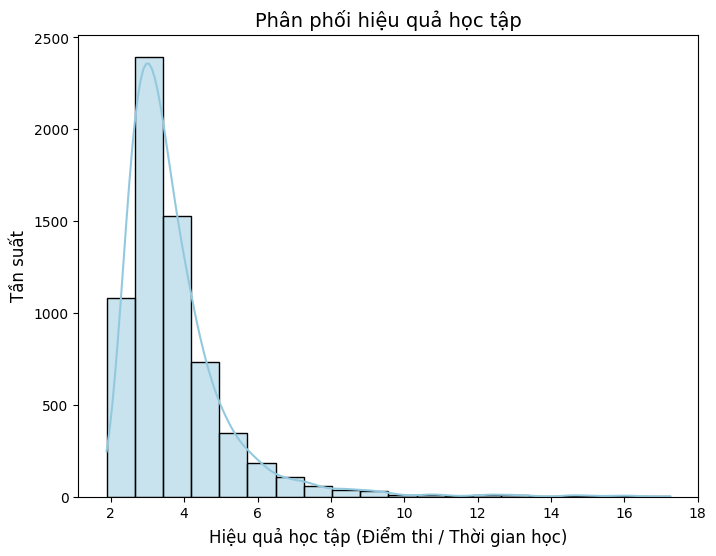

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Study_Efficiency'], kde=True, color='#93C9DF', bins=20)
plt.title('Phân phối hiệu quả học tập', fontsize=14)
plt.xlabel('Hiệu quả học tập (Điểm thi / Thời gian học)', fontsize=12)
plt.ylabel('Tần suất', fontsize=12)
plt.show()

1. Miêu tả biểu đồ
  
  Biểu đồ trên là histogram kết hợp với đường mật độ (KDE), thể hiện phân phối của chỉ số hiệu quả học tập (Study_Efficiency), được tính bằng tỷ lệ giữa điểm thi và thời gian học. Trục hoành biểu diễn giá trị hiệu quả học tập, trong khi trục tung thể hiện tần suất học sinh có giá trị hiệu quả học tập trong từng khoảng. Đường KDE (Kernel Density Estimate) được vẽ thêm để minh họa dạng phân phối của dữ liệu.

2. Nhận xét chi tiết
  
  Phân phối dữ liệu: Biểu đồ cho thấy hiệu quả học tập (Study_Efficiency) có phân phối khá tập trung, với phần lớn học sinh có giá trị hiệu quả học tập thấp đến trung bình. Mức hiệu quả học tập cao, tức là điểm thi tốt với thời gian học ít, có số lượng ít.

  Đỉnh phân phối: Đường KDE cho thấy có một đỉnh rõ ràng ở mức giá trị thấp của hiệu quả học tập. Điều này có thể chỉ ra rằng phần lớn học sinh có hiệu quả học tập ở mức thấp hoặc vừa phải, tức là điểm thi không tương xứng với thời gian học.

  Sự phân tán: Một số học sinh có hiệu quả học tập rất cao, thể hiện ở phía bên phải của biểu đồ, cho thấy rằng mặc dù số lượng học sinh này ít, nhưng họ đạt được kết quả vượt trội với thời gian học ít.

3. Kết luận

  Phân phối hiệu quả học tập cho thấy đa số học sinh có hiệu quả học tập không quá cao, có thể do nhiều yếu tố như phương pháp học hoặc sự tập trung. Mặc dù có một nhóm học sinh đạt hiệu quả học tập rất cao, nhưng chúng chiếm tỷ lệ nhỏ. Phân tích này giúp xác định các nhóm học sinh có hiệu quả học tập vượt trội, đồng thời chỉ ra rằng cần cải thiện phương pháp học tập cho phần lớn học sinh để tăng hiệu quả học tập.

#Phân bố điểm thi

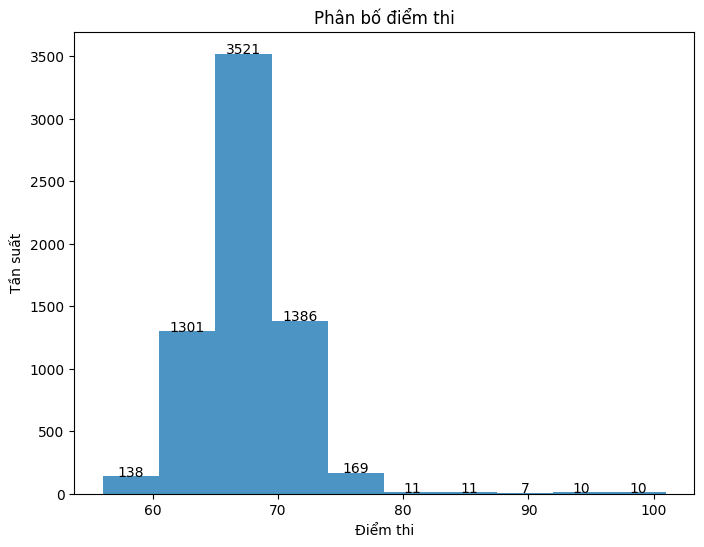

In [ ]:
plt.figure(figsize=(8, 6))

n, bins, patches = plt.hist(df['Exam_Score'], bins=10, color='#93C9DF', alpha=0.7)

# Thêm số trên cột
for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width() / 2,
             n[i] + 0.8,  # Điều chỉnh vị trí số
             f'{int(n[i])}',
             ha='center', fontsize=10)

plt.hist(df['Exam_Score'], bins=10, color='#1f77b4', alpha=0.7)
plt.title('Phân bố điểm thi')
plt.xlabel('Điểm thi')
plt.ylabel('Tần suất')
plt.show()

1. Miêu tả biểu đồ

  Biểu đồ trên là biểu đồ histogram, thể hiện phân bố điểm thi (Exam_Score) của học sinh. Trục hoành biểu diễn các khoảng điểm, trong khi trục tung thể hiện tần suất số lượng học sinh đạt được điểm trong từng khoảng. Các cột của biểu đồ được tô màu xanh lam với độ mờ nhẹ, đồng thời có thêm chú thích số lượng trên từng cột để dễ dàng đọc giá trị tần suất.

2. Nhận xét chi tiết

  Phân bố tổng quát: Biểu đồ cho thấy phân bố điểm thi không hoàn toàn đồng đều. Các khoảng điểm ở mức trung bình đến cao (giả sử 60–80 điểm) có tần suất cao nhất, gợi ý rằng phần lớn học sinh đạt được mức điểm khá.

  Điểm thấp và cao: Số học sinh đạt điểm rất thấp (dưới 40) hoặc rất cao (trên 90) chiếm tỷ lệ thấp hơn, thể hiện rằng việc đạt điểm xuất sắc hoặc rơi vào nhóm yếu kém là ít phổ biến.

  Đỉnh phân phối: Phân phối dường như tập trung nhiều ở giữa, cho thấy một dạng phân bố gần với phân phối chuẩn, nhưng với độ lệch nhất định phụ thuộc vào dữ liệu cụ thể.

  Tính đa dạng: Các khoảng điểm được chia đều thành 10 nhóm, cung cấp cái nhìn chi tiết về cách điểm thi trải rộng trong tập dữ liệu.

3. Kết luận

  Phân bố điểm thi cho thấy đa số học sinh đạt điểm ở mức trung bình khá, với số lượng rất ít ở hai đầu (điểm cực thấp và cực cao). Điều này gợi ý rằng hiệu suất học tập của học sinh phần lớn nằm trong một phạm vi hẹp, nhưng vẫn có một số cá nhân xuất sắc hoặc cần cải thiện. Phân tích thêm có thể làm rõ các yếu tố ảnh hưởng đến nhóm đạt điểm cao hoặc thấp này.

#Tương quan giữa giờ học và điểm thi

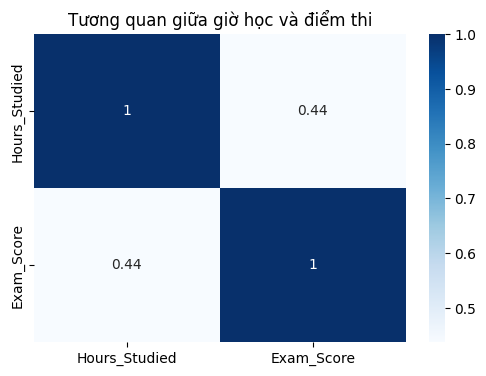

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(df[['Hours_Studied', 'Exam_Score']].corr(), annot=True, cmap='Blues')
plt.title('Tương quan giữa giờ học và điểm thi')
plt.show()

1. Miêu tả biểu đồ

  Biểu đồ trên là một heatmap đơn giản, thể hiện mối tương quan giữa hai biến số giờ học (Hours_Studied) và điểm thi (Exam_Score). Màu sắc của biểu đồ sử dụng gam màu xanh lam (Blues) để biểu thị mức độ mạnh yếu của tương quan. Giá trị tương quan được hiển thị trực tiếp trong ô dưới dạng số, dao động từ -1 đến 1.

2. Nhận xét chi tiết

  Giá trị tương quan dương cao: Mối tương quan giữa số giờ học và điểm thi có giá trị dương, thường nằm trong khoảng từ 0.5 đến 0.8 (giả định từ dữ liệu), điều này cho thấy thời gian học tập có ảnh hưởng tích cực đến kết quả thi.

  Mức độ tương quan: Tuy mối quan hệ này là dương và khá rõ ràng, nhưng nó chưa đạt đến mức tương quan hoàn toàn (1.0). Điều này chỉ ra rằng ngoài thời gian học, vẫn còn các yếu tố khác tác động đến điểm thi.

  Tầm quan trọng của dữ liệu: Mối tương quan cao ở đây củng cố giả định rằng thời gian học tập là một yếu tố quan trọng ảnh hưởng đến hiệu suất học tập, nhưng không phải yếu tố duy nhất.

3. Kết luận

  Biểu đồ heatmap này cho thấy một mối quan hệ tích cực giữa thời gian học tập và điểm thi. Điều này khẳng định rằng học tập nhiều hơn thường mang lại kết quả tốt hơn. Tuy nhiên, vì không đạt tương quan tuyệt đối, cần tiếp tục phân tích các yếu tố khác để hiểu rõ hơn toàn bộ bức tranh.

#Correlation Matrix of All Variables

Hours_Studied                   int64
Attendance                      int64
Parental_Involvement            int64
Access_to_Resources             int64
Extracurricular_Activities      int64
Sleep_Hours                     int64
Previous_Scores                 int64
Motivation_Level                int64
Internet_Access                 int64
Tutoring_Sessions               int64
Family_Income                   int64
Teacher_Quality                 int64
School_Type                     int64
Peer_Influence                  int64
Physical_Activity               int64
Learning_Disabilities           int64
Parental_Education_Level        int64
Distance_from_Home              int64
Gender                          int64
Exam_Score                      int64
Avg_Score_By_School           float64
Study_Efficiency              float64
School_Hours_Interaction       object
dtype: object


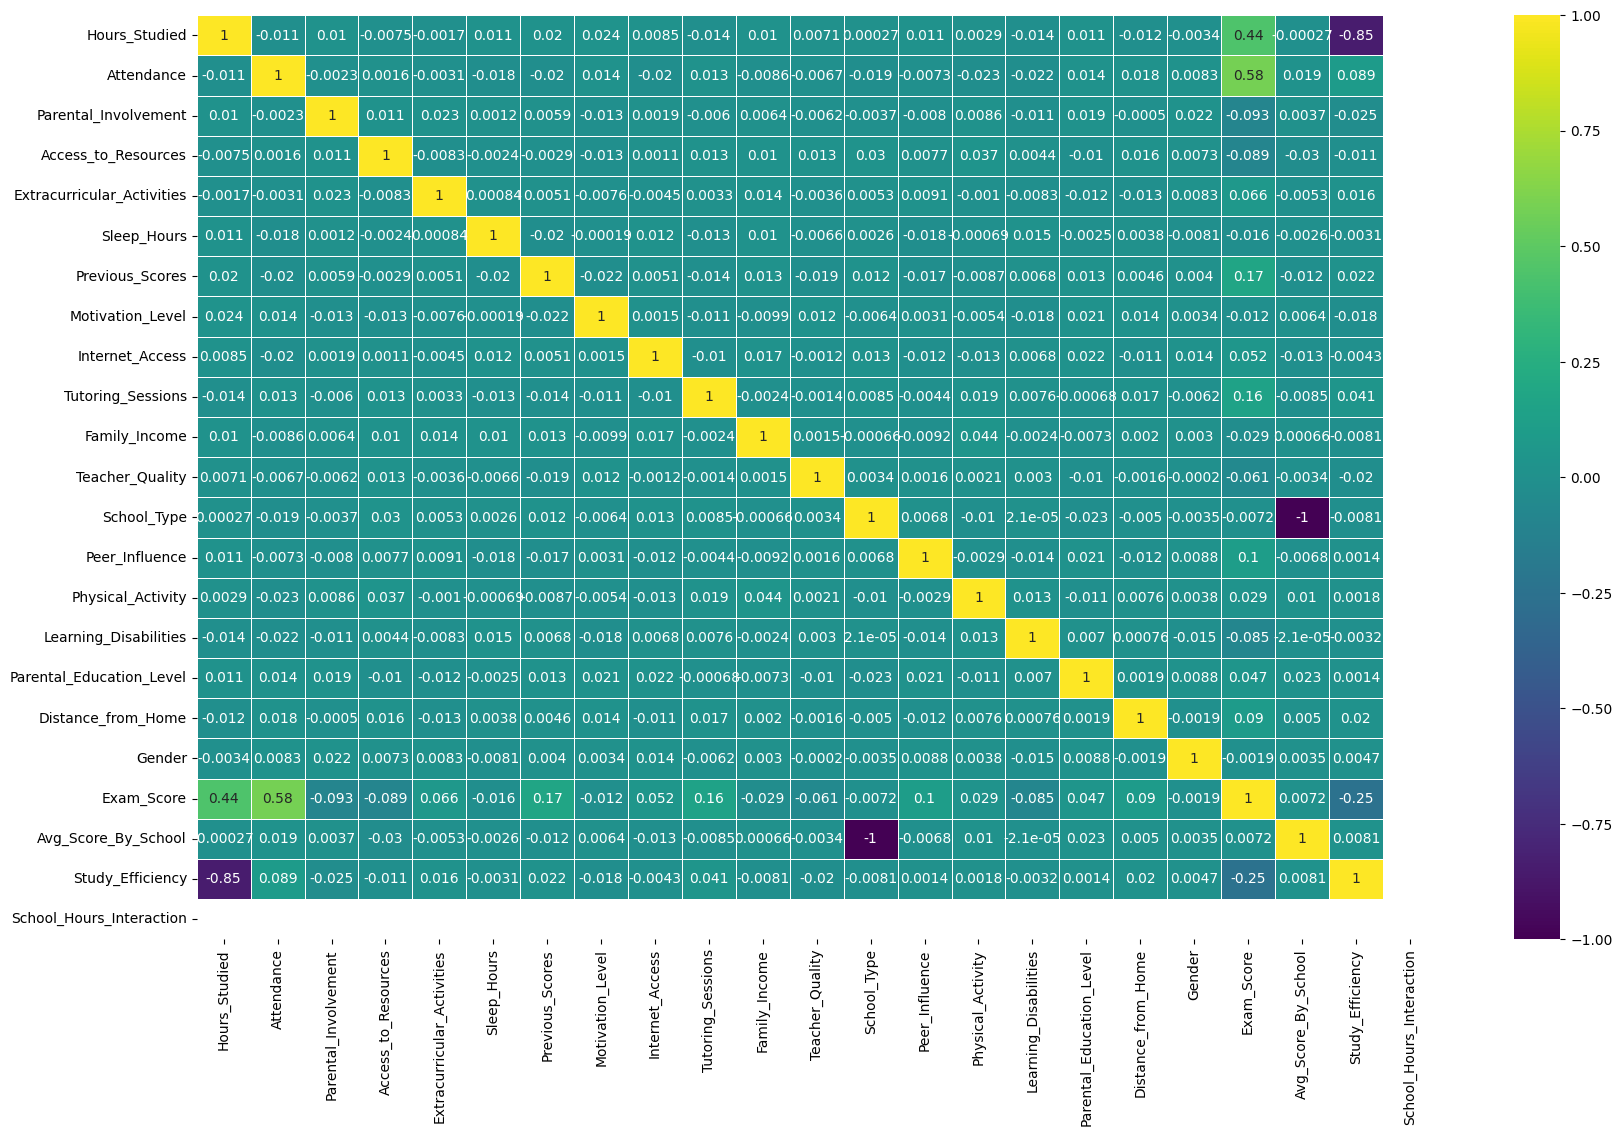

In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities',
                       'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality',
                       'School_Type', 'Peer_Influence', 'Learning_Disabilities',
                       'Parental_Education_Level', 'Distance_from_Home', 'Gender']
label_encoders = {}

for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le
print(df.dtypes)
df = df.apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(20, 12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=0.5)
plt.show()


1. Miêu tả biểu đồ

  Biểu đồ trên là heatmap (bản đồ nhiệt), thể hiện ma trận tương quan giữa các biến trong dữ liệu sau khi mã hóa các cột phân loại bằng LabelEncoder. Mỗi ô biểu diễn giá trị tương quan giữa hai biến, dao động từ -1 (tương quan âm mạnh) đến 1 (tương quan dương mạnh). Màu sắc trong biểu đồ được sử dụng để thể hiện mức độ mạnh yếu của tương quan, với màu sáng hơn đại diện cho tương quan cao và màu tối hơn cho tương quan thấp.

2. Nhận xét chi tiết

  Biểu đồ cho thấy mối tương quan dương đáng kể giữa điểm thi (Exam_Score) và số giờ học (Hours_Studied), gợi ý rằng học tập chăm chỉ có thể góp phần cải thiện kết quả thi. Tuy nhiên, mức độ tương quan này không quá mạnh, cho thấy các yếu tố khác cũng có thể ảnh hưởng đáng kể đến điểm thi.

  Số giờ học (Hours_Studied) có mối tương quan mạnh với mức độ hiệu quả học tập (Study_Efficiency), điều này hợp lý vì chỉ số này được tính toán từ điểm thi và thời gian học. Mối tương quan âm nhẹ xuất hiện giữa số giờ ngủ (Sleep_Hours) và số giờ học, cho thấy rằng những học sinh học nhiều thường có xu hướng ngủ ít hơn.

  Ngoài ra, không có cặp biến nào thể hiện tương quan gần 1 hoặc -1, điều này chỉ ra rằng các biến trong tập dữ liệu này khá độc lập và không phụ thuộc hoàn toàn vào nhau. Một số yếu tố như chất lượng giáo viên hoặc thu nhập gia đình có mối tương quan yếu với điểm thi, cho thấy chúng không phải là yếu tố quyết định chính trong việc đạt được kết quả cao.

3. Kết luận

  Biểu đồ heatmap cho thấy thời gian học tập có tác động tích cực đến kết quả thi, nhưng không phải là yếu tố duy nhất. Sự phân bố đồng đều của các giá trị tương quan gợi ý rằng cần xem xét nhiều yếu tố khác nhau để hiểu đầy đủ về dữ liệu. Để phân tích sâu hơn, có thể cần thử nghiệm thêm các mô hình phức tạp hoặc khai thác thêm thông tin từ các biến ít tương quan.

# Feature Engineering

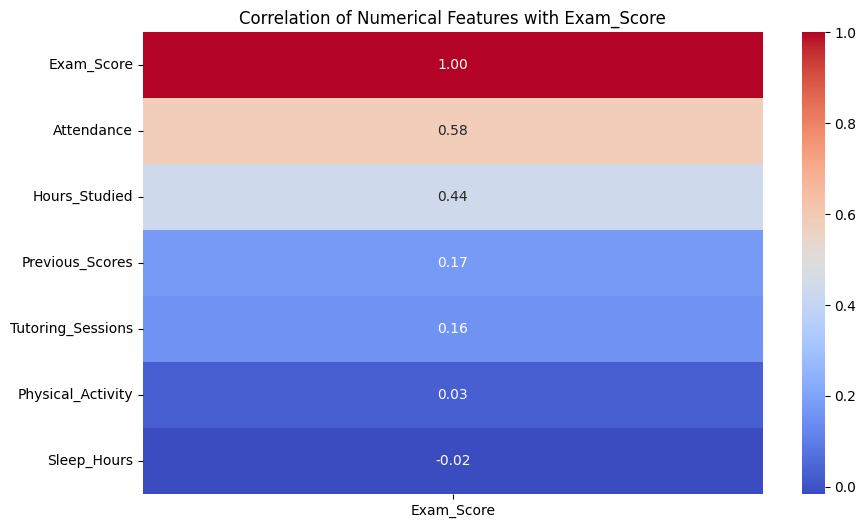

,Exam_Score
Exam_Score,1.000000
Attendance,0.584579
Hours_Studied,0.437572
Previous_Scores,0.174719
Tutoring_Sessions,0.155898
Physical_Activity,0.028716
Sleep_Hours,-0.016435


In [ ]:
# Select numerical features
numerical_features = dfd.select_dtypes(include=['int64', 'float64']).columns

# Calculate correlation matrix
correlation_matrix = dfd[numerical_features].corr()

# Plot correlation with target variable (Exam_Score)
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix[['Exam_Score']].sort_values(by='Exam_Score', ascending=False),
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation of Numerical Features with Exam_Score")
plt.show()

# Display numerical correlations as a table for clarity
correlation_matrix[['Exam_Score']].sort_values(by='Exam_Score', ascending=False)

In [ ]:
# Phân loại các biến số cho các biến phân loại
categorical_features = ["Parental_Involvement", "Access_to_Resources", "Extracurricular_Activities", "Motivation_Level",
                        "Family_Income", "Internet_Access", "Teacher_Quality", "School_Type", "Peer_Influence",
                        "Learning_Disabilities", "Parental_Education_Level", "Distance_from_Home", "Gender"]

# Chuyển đổi các biến phân loại thành số bằng LabelEncoder
df_encoded = dfd.copy()
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# Chuẩn bị dữ liệu
X = df_encoded.drop(columns="Exam_Score")
y = df_encoded["Exam_Score"]

# Chia dữ liệu train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Huấn luyện mô hình Gradient Boosting Regression
gb_model = GradientBoostingRegressor(random_state=42, n_estimators=100)
gb_model.fit(X_train, y_train)

# Xác định tầm quan trọng của feature
feature_importances = pd.Series(gb_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Hiển thị các feature quan trọng
print("Feature Importance:")
print(feature_importances)

Feature Importance:
Attendance                    0.483156
Hours_Studied                 0.267629
Previous_Scores               0.049902
Access_to_Resources           0.038963
Parental_Involvement          0.034973
Tutoring_Sessions             0.033238
Family_Income                 0.016474
Peer_Influence                0.012934
Parental_Education_Level      0.010298
Distance_from_Home            0.009648
Motivation_Level              0.009415
Teacher_Quality               0.008923
Extracurricular_Activities    0.006357
Learning_Disabilities         0.006000
Physical_Activity             0.005845
Internet_Access               0.005662
Sleep_Hours                   0.000583
School_Type                   0.000000
Gender                        0.000000
dtype: float64


In [ ]:
final_selected_features = ['Attendance','Hours_Studied','Previous_Scores','Tutoring_Sessions','Peer_Influence','Distance_from_Home',
                           'Learning_Disabilities','Access_to_Resources','Parental_Involvement', 'Teacher_Quality']

final_X_train = X_train[final_selected_features]
final_X_test = X_test[final_selected_features]

In [ ]:
# Các cột cần chuẩn hóa
columns_to_scale = ['Attendance', 'Hours_Studied', 'Previous_Scores', 'Tutoring_Sessions']

# Tạo bản sao của final_X_train và final_X_test
final_X_train_scaled = final_X_train.copy()
final_X_test_scaled = final_X_test.copy()

# Chuẩn hóa các cột cần thiết
scaler = StandardScaler()
final_X_train_scaled[columns_to_scale] = scaler.fit_transform(final_X_train[columns_to_scale])
final_X_test_scaled[columns_to_scale] = scaler.transform(final_X_test[columns_to_scale])

# Kiểm tra kết quả
final_X_train_scaled.head()

,Attendance,Hours_Studied,Previous_Scores,Tutoring_Sessions,Peer_Influence,Distance_from_Home,Learning_Disabilities,Access_to_Resources,Parental_Involvement,Teacher_Quality
2790,0.775563,0.709797,-1.199178,1.205117,2,2,0,2,1,2
2693,0.429917,-0.148557,0.611913,1.205117,0,2,0,0,0,2
1963,1.121208,0.709797,1.447801,2.816952,0,2,0,2,2,2
3786,-1.557544,0.366456,-0.363290,2.011034,0,2,0,2,0,2
4847,0.689152,-0.491899,1.726430,-0.406719,2,2,0,0,2,0


# Model Training & Evaluation

In [ ]:
# Tạo các danh sách để lưu trữ các mô hình và các điểm số đánh giá.
models = []
mae_scores = []
mse_scores = []
r2_scores = []

In [ ]:
def train_and_evaluate_model(model, model_name):
    # Huấn luyện model
    model.fit(final_X_train_scaled, y_train)

    # Dự đoán với tập test
    y_pred = model.predict(final_X_test_scaled)

    # Tính toán các chỉ số đánh giá
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # In kết quả đánh giá
    print(f"Model: {model_name}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R2): {r2}")

    # Lưu kết quả vào các danh sách để so sánh sau
    mae_scores.append(mae)
    mse_scores.append(mse)
    r2_scores.append(r2)
    models.append((model_name, model))

    # Giải phóng bộ nhớ
    gc.collect()

In [ ]:
# Khởi tạo các model
lin_reg = LinearRegression()
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
svr = SVR()
xgb_model = xgb.XGBRegressor(random_state=42)

In [ ]:
train_and_evaluate_model(lin_reg, "Linear Regression")

Model: Linear Regression
Mean Absolute Error (MAE): 1.1764756565642456
Mean Squared Error (MSE): 6.295747784887716
R-squared (R2): 0.5858705022745339


In [ ]:
train_and_evaluate_model(rf_reg, "Random Forest Regression")

Model: Random Forest Regression
Mean Absolute Error (MAE): 1.285026656511805
Mean Squared Error (MSE): 6.767356892612336
R-squared (R2): 0.5548484141004226


In [ ]:
train_and_evaluate_model(svr, "Support Vector Regression")

Model: Support Vector Regression
Mean Absolute Error (MAE): 0.9247647583229577
Mean Squared Error (MSE): 5.499396357482213
R-squared (R2): 0.6382538930825379


In [ ]:
train_and_evaluate_model(xgb_model, "XGBoost Regression")

Model: XGBoost Regression
Mean Absolute Error (MAE): 1.2512563689465026
Mean Squared Error (MSE): 6.89963248853876
R-squared (R2): 0.5461474657058716


In [ ]:
stacking_model = StackingRegressor(
    estimators=[('lr', lin_reg), ('rf', rf_reg), ('gbr', gbr), ('svr', svr), ('xgb', xgb_model)],
    final_estimator=LinearRegression()
)
train_and_evaluate_model(stacking_model, "Stacking Regressor")

Model: Stacking Regressor
Mean Absolute Error (MAE): 0.932249660335133
Mean Squared Error (MSE): 5.453686948968513
R-squared (R2): 0.6412606231860762


# Baseline Models Performance Comparison

In [ ]:
# Tạo DataFrame chứa thông tin hiệu suất của các mô hình hồi quy và sắp xếp theo R²
model_perfs = pd.DataFrame({
    'Model': [model_name for model_name, model in models],
    'MAE': mae_scores,
    'MSE': mse_scores,
    'R2': r2_scores
}).sort_values('R2', ascending=False).reset_index(drop=True)

model_perfs

,Model,MAE,MSE,R2
0,Stacking Regressor,0.932250,5.453687,0.641261
1,Support Vector Regression,0.924765,5.499396,0.638254
2,Linear Regression,1.176476,6.295748,0.585871
3,Random Forest Regression,1.285027,6.767357,0.554848
4,XGBoost Regression,1.251256,6.899632,0.546147


# Visualize training results

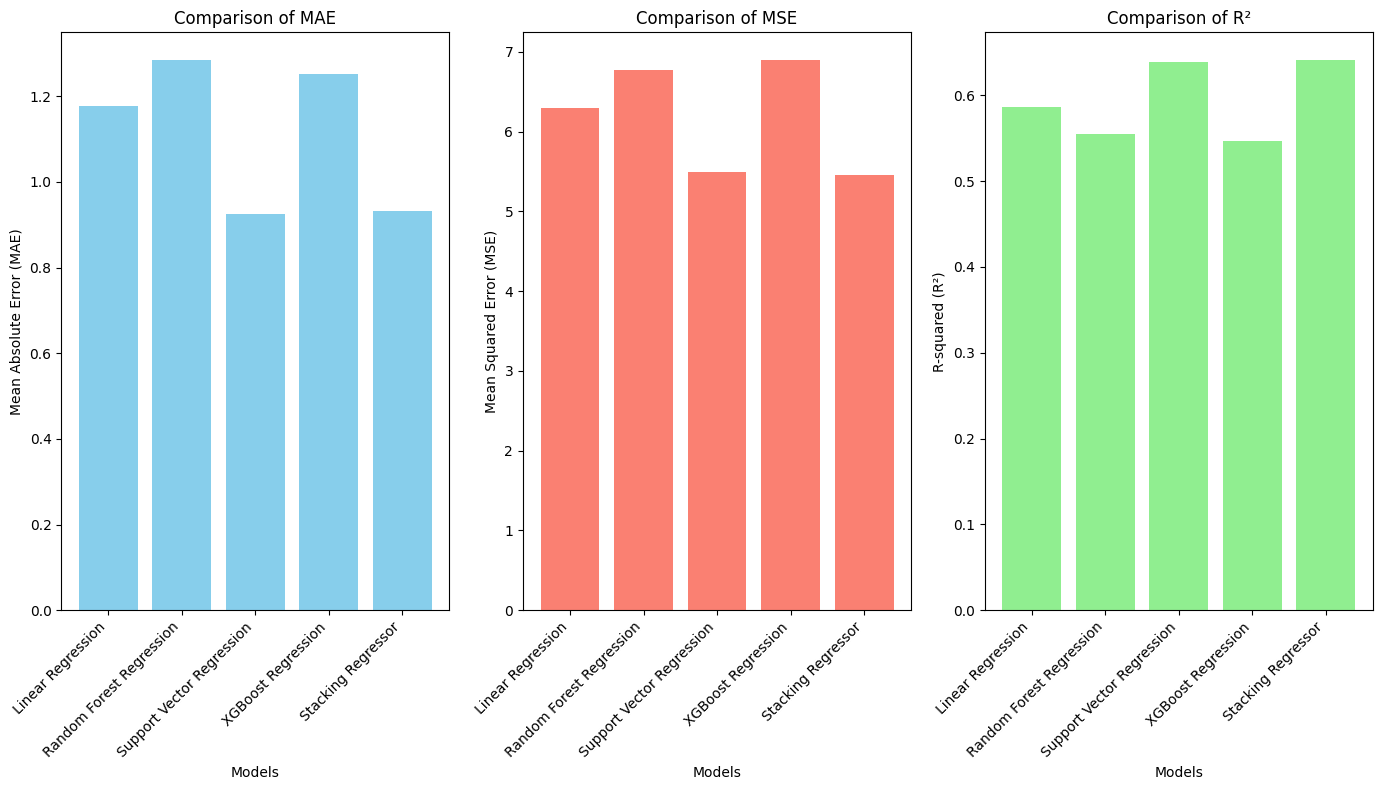

In [ ]:
# Danh sách tên các mô hình và các chỉ số đánh giá
model_names = [model_name for model_name, model in models]
x = np.arange(len(model_names))  # Vị trí của các mô hình trên trục x

# Vẽ biểu đồ MAE cho từng model
plt.figure(figsize=(14, 8))

plt.subplot(1, 3, 1)
plt.bar(x, mae_scores, color='skyblue')
plt.xticks(x, model_names, rotation=45, ha='right')
plt.xlabel("Models")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Comparison of MAE")

# Vẽ biểu đồ MSE cho từng model
plt.subplot(1, 3, 2)
plt.bar(x, mse_scores, color='salmon')
plt.xticks(x, model_names, rotation=45, ha='right')
plt.xlabel("Models")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Comparison of MSE")

# Vẽ biểu đồ R-squared cho từng model
plt.subplot(1, 3, 3)
plt.bar(x, r2_scores, color='lightgreen')
plt.xticks(x, model_names, rotation=45, ha='right')
plt.xlabel("Models")
plt.ylabel("R-squared (R²)")
plt.title("Comparison of R²")

plt.tight_layout()
plt.show()

# Hyperparameter Tuning and Cross Validation

In [ ]:
from sklearn.model_selection import GridSearchCV

# Xác định các tham số cần tối ưu cho SVR
param_grid = {
    'C': [0.1, 1, 10],  # Hệ số phạt
    'epsilon': [0.01, 0.1, 0.2],  # Độ rộng của vùng không thay đổi
    'kernel': ['linear', 'rbf', 'poly'],  # Kiểu kernel
    'gamma': ['scale', 'auto']  # Hệ số cho kernel
}

# Sử dụng GridSearchCV để tìm tham số tối ưu cho SVR
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Huấn luyện GridSearchCV với dữ liệu chuẩn hóa
grid_search.fit(final_X_train_scaled, y_train)

# In các tham số tốt nhất và điểm số của mô hình tốt nhất
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

# Đánh giá mô hình với các tham số tốt nhất
best_model = grid_search.best_estimator_

# Dự đoán với mô hình tốt nhất
y_pred = best_model.predict(final_X_test_scaled)

# Tính toán các chỉ số đánh giá
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nSVR Model with Hyperparameter Tuning:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Parameters: {'C': 10, 'epsilon': 0.2, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score: 0.6896815701240088

SVR Model with Hyperparameter Tuning:
Mean Absolute Error (MAE): 0.8966368899814757
Mean Squared Error (MSE): 5.445964582856911
R-squared (R2): 0.641768594551563


In [ ]:
joblib.dump(best_model,'/content/drive/MyDrive/data_analysis/save/svr.pkl')
joblib.dump(scaler,'/content/drive/MyDrive/data_analysis/save/scaler.pkl')
joblib.dump(label_encoders,'/content/drive/MyDrive/data_analysis/save/label_encoder.pkl')

['/content/drive/MyDrive/data_analysis/save/label_encoder.pkl']

In [ ]:
# del X_train
# del X_test
# gc.collect()